<font size="6">Explainability</font>

В современном мире машинного обучения тема объяснимости и интерпретируемости моделей становится неотъемлемой частью развития искуственного интеллекта.

Когда алгоритмы машинного обучения используются для принятия решений, особенно в чувствительных областях, таких как медицина или право, а также в научных применениях, важно понимать, почему модель делает тот или иной вывод.

В этой лекции мы рассмотрим концепции и методы, касающиеся способов представления и объяснения выводов, полученных от моделей машинного обучения.



# Мотивация использования Explainability

Модели машинного обучения представляют собой черный ящик.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/input_blackbox_output.png" alt="alttext" width="400"/></center>

Иногда это  становится препятствием для внедрения моделей.

Есть как минимум три причины, по которым нас может интересовать объяснение предсказаний модели.

**1. Доверие к предсказаниям**

Нельзя остановить ядерную электростанцию или назначить пациенту опасное лечение лишь на основании предсказания «черного ящика».
Даже маловероятная ошибка в таких случаях будет иметь тяжелые последствия. Поэтому человек, принимающий решение, должен понимать, на основе каких признаков или симптомов сделано предсказание.

**2. Обнаружение некорректных зависимостей**

Модель может использовать совсем не те признаки, которые соответствуют реальным объектам. То есть вместо реальных свойств объекта ориентироваться на случайно обнаруженные зависимости, не связанные с реальными данными (фон, водяной знак и т. п.).

Яркий пример мы можем увидеть в статье ["Why Should I Trust You?" 🎓[arxiv]](https://arxiv.org/abs/1602.04938), авторы которой обучили классификатор волков и хаски на изображениях, отобранных так, чтобы на всех фотографиях волков на фоне был снег, а на фотографиях хаски — нет. На рисунке ниже мы можем увидеть, на что обращает внимание при предсказаниях полученная в результате такого обучения модель.

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/2_bad_models_prediction.png" alt="alttext" width="400"/></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1602.04938.pdf">Explaining the Predictions of Any Classifier</a></em></center>

**3. Публикации в научных журналах**

Вероятность публикации статьи значительно повышается, если автор смог объяснить происхождение результатов своего исследования.

<font size="5"> Explainability & Interpretability </font>

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/explainability_vs_interpretability.png" alt="alttext" width="1000"/></center>


В англоязычной литературе можно встретить два термина, связанные с темой доверия к ML моделям: Explainability и Interpretability. Терминология в этой области еще не устоялась, и в разных источниках эти термины определяют по-разному. Можно выделить следующие характерные различия:

* **Explainability** — методики, позволяющие объяснить механизм функционирования модели. Например, для линейной регрессии это анализ коэффициентов при параметрах.

* **Interpretability** — анализ того, как изменение входов модели влияло на ее выходы. Например, закрашивая часть пикселей изображения, можно выяснить, какие из них повлияют на предсказания (пример с хаски и волками).

Мы рассмотрим оба типа методов.

[[blog] ✏️ Machine Learning Explainability vs Interpretability: Two concepts that could help restore trust in AI](https://www.kdnuggets.com/2018/12/machine-learning-explainability-interpretability-ai.html)


# Объяснимость моделей классического ML

Некоторые алгоритмы машинного обучения обладают свойством объяснимости сами по себе. Объяснить, почему модель выдала то или иное предсказание, возможно непосредственно исходя из понимания принципа работы модели.

Чтобы подчеркнуть, что в отличие от "черных ящиков" внутреннее устройство таких моделей прозрачно и понятно, их называют "белыми" или "прозрачными" ящиками (glass box).

В частности, к таким алгоритмам относятся **линейные модели** и **модели, основанные на деревьях решений**.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/glass_box.png" alt="alttext" width="400"/></center>


## Оценка важности признаков для линейных моделей


В случае с **линейными моделями** нам было сравнительно легко определить, какие признаки модель считает важными. Если модель присваивает какому-то признаку **большой вес**, то этот признак сильнее влияет на **предсказание**.

При этом стоит отметить, что **признаки должны быть сравнимы**, то есть должны находиться в сравнимых диапазонах и быть выражены в одних единицах измерения (или быть безразмерными).


### Пример для табличных данных (Boston Dataset)

Для примера скачаем **датасет жилья Бостона** ([The Boston Housing Dataset 🛠️[doc]](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)), в котором проанализируем зависимость цены на жилье от параметров жилья и района, в котором оно находится.

In [ ]:
import pandas as pd

# load dataset
boston_dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/boston_dataset.csv",
    index_col=0,
)
x_data = boston_dataset.iloc[:, :-1]
y_data = boston_dataset["target"].values

boston_dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

Посмотрим на статистики признаков:

In [ ]:
boston_dataset.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      target  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

Из описательных статистик по признакам видно, что признаки несравнимы. Поэтому коэффициенты линейной модели, обученной на таких данных будут нести в себе не только важность, но и масштабировать значения, чтобы перевести их в размерность целевой переменной. Этот факт будет мешать интерпретировать значения весов перед признаками как степень их влияния на предскзазание целевой переменной.


Обучим модель на **стандартизованных данных**:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

ss = StandardScaler()
x_data_scaled = ss.fit_transform(x_data)

model = LinearRegression()
model.fit(x_data_scaled, y_data)

LinearRegression()

Выведем **коэффициенты** признаков, отсортированные по абсолютному значению:

In [ ]:
linear_importance = pd.DataFrame(
    {"name": boston_dataset.columns[:-1], "coef": model.coef_}
).sort_values("coef", key=abs, ascending=False)

linear_importance

name      coef
12    LSTAT -3.743627
7       DIS -3.104044
5        RM  2.674230
8       RAD  2.662218
9       TAX -2.076782
10  PTRATIO -2.060607
4       NOX -2.056718
1        ZN  1.081569
0      CRIM -0.928146
11        B  0.849268
3      CHAS  0.681740
2     INDUS  0.140900
6       AGE  0.019466

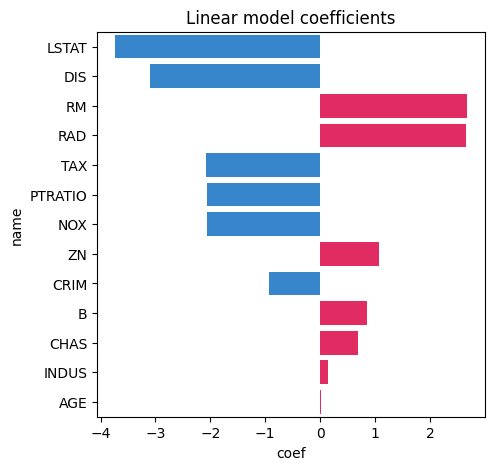

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

linear_importance["sign"] = linear_importance["coef"].apply(lambda x: "neg" if x < 0 else "pos")
palette = {"neg": "#1e88e5", "pos": "#ff0d57"}

plt.figure(figsize=(5, 5))
plt.title("Linear model coefficients")
sns.barplot(
    data=linear_importance, y="name", x="coef", hue="sign", palette=palette, legend=False, orient="h"
)
plt.show()

Добавим абсолютные значения для сравнения с другими оценками важности.

In [ ]:
linear_importance["abs(coef)"] = linear_importance["coef"].abs()

## Оценка важности признаков для деревьев решений

В случае с **деревьями** всё далеко не так очевидно: дерево не знает такой концепции, как **"вес признака"**.

Универсального критерия значимости для деревьев у нас нет, и, в зависимости от задачи и от того, как эти признаки устроены, ответы могут быть разными.

С одним из способов оценки качества признаков для дерева решений мы познакомились, когда строили дерево решений на третьей лекции. Мы использовали метрику $\text{Gini}$:

$$\large \text{Gini} = 1 - \sum_ip_i^2,$$

где $p_i$ — вероятность того, что объект, попавший в данный  лист, относится к $i$-му классу. Чем меньше $\text{Gini}$ в листьях, тем лучше узел, от которого “растут” листья, разделяет классы.


Для того, чтобы охарактеризовать, насколько данный узел хорошо разделяет выборку, мы строили метрику $\text{impurity}$, в которой суммировали $\text{Gini}$ листьев данного узла с весами, равными доле объектов, попавших в данный лист. После чего смотрели, на сколько $\text{impurity}$ уменьшилось ($\text{decrease}$) на данном узле (стало ближе к “идеальному” нулю).


$$\large \text{Impurity decrease} = \text{Gini}_0 - (\dfrac{n_1}{n_1+n_2}\text{Gini}_1 + \dfrac{n_2}{n_1+n_2}\text{Gini}_2),$$

где $n_1, n_2$ — число объектов в листьях, $ \text{Gini}_0$ — чистота исходного узла.

Именно $\text{impurity decrease}$ используется для расчета атрибута `feature_importances_` [️️🛠️[doc]](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) в Sklearn. Для случайного леса (и других ансамблей) просто выдается среднее по деревьям.


У данного метода есть **недостаток**: он завышает качество признаков с большим количеством возможных значений.

Даже если признак не информативен, но у него много значений, на нем можно выбрать большое количество порогов, по которым можно разбить данные, что приведет к переобучению.

Бинарные и категориальные признаки с небольшим числом категорий потенциально могут получать заниженное качество по сравнению с вещественными, даже если те дают худшее разбиение.

### Пример для табличных данных (Boston Dataset)

Посмотрим на важность признаков, основанную на **impurity decrease**.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rng = np.random.RandomState(42)
model = RandomForestRegressor(random_state=rng)
model.fit(x_data, y_data)

RandomForestRegressor(random_state=RandomState(MT19937) at 0x7B5C08F46340)

In [ ]:
gini_importance = pd.DataFrame(
    {
        "name": boston_dataset.columns[:-1],
        "feature importances": model.feature_importances_,
    }
).sort_values("feature importances", ascending=False)
gini_importance

name  feature importances
12    LSTAT             0.450044
5        RM             0.362574
7       DIS             0.062982
0      CRIM             0.034634
4       NOX             0.021108
10  PTRATIO             0.016098
9       TAX             0.014828
6       AGE             0.014450
11        B             0.010778
2     INDUS             0.006308
8       RAD             0.003774
1        ZN             0.001534
3      CHAS             0.000888

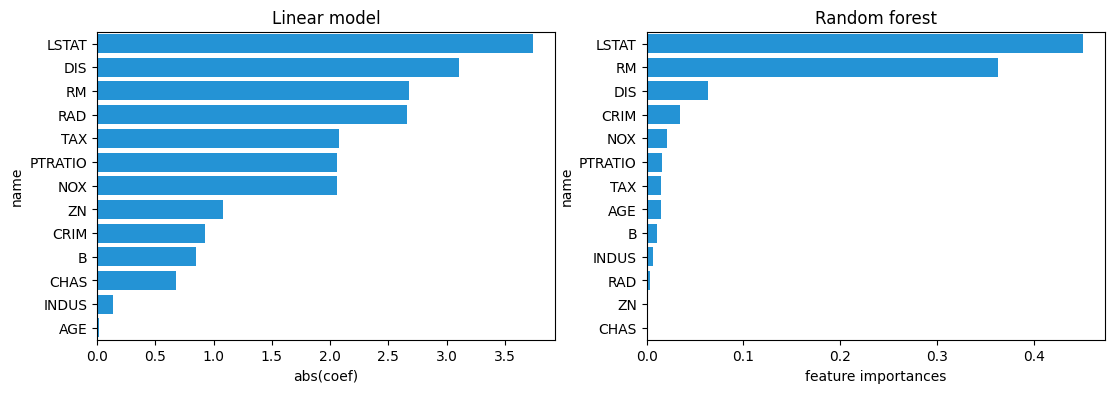

In [ ]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.title("Linear model")
sns.barplot(
    data=linear_importance,
    y="name",
    x="abs(coef)",
    color=sns.xkcd_rgb["azure"],
    orient="h",
)

plt.subplot(1, 2, 2)
plt.title("Random forest")
sns.barplot(
    data=gini_importance,
    y="name",
    x="feature importances",
    color=sns.xkcd_rgb["azure"],
    orient="h",
)
plt.show()

Можно видеть, что важность признаков для одних и тех же данных зависит от модели. При этом признаки RM — количество комнат в доме, и LSTAT — процент людей с низким социальным статусом (без среднего образования, безработных), важны для обеих моделей, что достаточно логично.

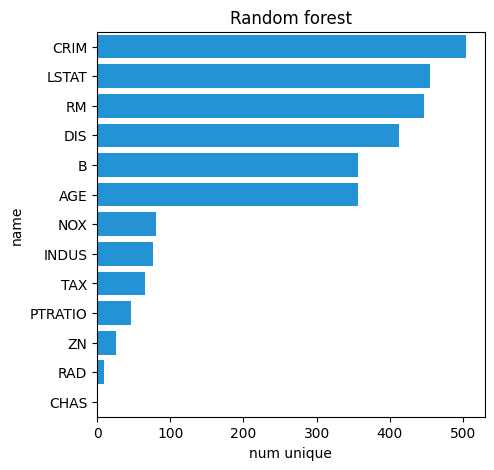

In [ ]:
x_data = boston_dataset.iloc[:, :-1]

num_unique = [x_data[column].nunique() for column in x_data.columns]

num_unique = pd.DataFrame(
    {"name": x_data.columns, "num unique": num_unique}
).sort_values("num unique", ascending=False)

plt.figure(figsize=(5, 5))
plt.title("Random forest")
sns.barplot(
    data=num_unique,
    y="name",
    x="num unique",
    color=sns.xkcd_rgb["azure"],
    orient="h",
)
plt.show()

Интересно отметить, что оба признака (RM и LSTAT), оказавшиеся наиболее важными для Random Forest, имеют большое количество уникальных значений.

# Методы, изучающие отклик модели на изменение входных данных

В этом разделе мы рассмотрим методы, изучающие отклик модели на изменение входных данных. Они также называются **Model-Agnostic Methods** и находятся ближе всего к концепции “черного ящика”. Эти методы изучают связь между входами и выходами модели и пытаются ее объяснить.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/black_box_interpretability.png" alt="alttext" width="500"/></center>

## ICE (Individual Conditional Expectation)

Одним из самых простых и интуитивно понятных методов является метод ICE (Individual Conditional Expectation). Он заключается в следующем:
1. Обучаем и **фиксируем модель**.
2. Выбираем **один объект**.
3. Выбираем **один признак** этого объекта, который мы будем **менять в некотором диапазоне**, все остальные признаки фиксируем.
4. Меняем этот признак и смотрим, как меняется **предсказание модели**.
5. Строим кривую зависимости **целевого значения** от **изменяемого признака** для модели.
6. Повторяем для другого объекта.

Посмотрим, как этот метод работает на примере модели Random Forest.

### Пример для табличных данных (Boston Dataset)

Загрузим и предобработаем  данные:

In [ ]:
import pandas as pd

# load dataset
boston_dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/boston_dataset.csv",
    index_col=0,
)
x_data = boston_dataset.iloc[:, :-1]
y_data = boston_dataset["target"].values

boston_dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

Обучим модель:

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rng = np.random.RandomState(42)
model = RandomForestRegressor(random_state=rng)
model.fit(x_data, y_data)

RandomForestRegressor(random_state=RandomState(MT19937) at 0x7B5C08F46F40)

Нам интересно посмотреть на два признака, которые были наиболее важны для предсказания: **RM** — среднее количество комнат в жилье, **LSTAT** — процент людей с низким социальным статусом, и на один признак, который для  **Random Forest** не важен: **AGE** — возраст постройки.

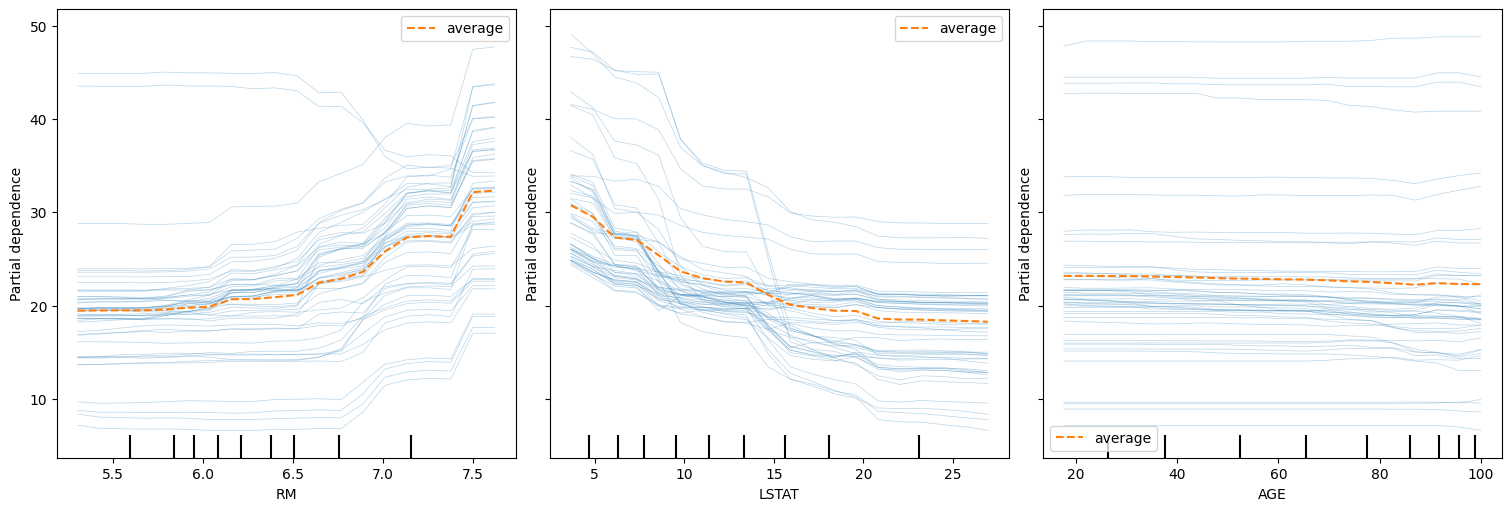

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

_, ax = plt.subplots(ncols=3, figsize=(15, 5), sharey=True, constrained_layout=True)

features_info = {
    "features": ["RM", "LSTAT", "AGE"],
    "kind": "both",
    "centered": False,
}

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

x_data = pd.DataFrame(x_data, columns=boston_dataset.iloc[:, :-1].columns)

display = PartialDependenceDisplay.from_estimator(
    model,
    x_data,
    **features_info,
    ax=ax,
    **common_params,
)

Синие линии — это отдельные объекты. По оси $x$ — изменяемые признаки для этих объектов, по оси $y$ — изменение целевого значения. Оранжевым цветом нарисовано среднее по объектам.

Видно, что увеличение количества комнат в большинстве случаев положительно влияет на цену жилья, увеличение процента людей с низким социальным статусом — отрицательно, а возраст постройки не важен.


## LIME (Local Interpretable Model-agnostic Explanations)

### Принцип работы

Нам бы хотелось оценивать все признаки одновременно для любой модели. Для этого можно попробовать **заменить "черный ящик"** (black-box) **"прозрачным"** (glass-box).

Ключевая идея [__LIME__ 🎓[arxiv]](https://arxiv.org/abs/1602.04938) — **локальная аппроксимация сложно-интерпретируемой** (black-box) модели при помощи **легко-интерпретируемой** (glass-box).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/lime_idea.png" width="400"></center>

Давайте разбирать идею по кусочкам:
1. **Локальная аппроксимация** — значит, что мы берем **один объект** и **модифицируем** его (изменяем признаки), чтобы получить небольшой датасет, локализованный вокруг исходного объекта.
2. **Сложно интерпретируемая модель** — модель, для которой мы проводим оценку (наш "черный ящик"). Ее мы используем для того, чтобы получить **предсказания** для датасета, построенного на основе одного объекта.
3. Таким образом, мы получаем **датасет**, включающий **признаки** и **предсказания** “черного ящика”. На этом датасете **учим** “прозрачный ящик” — **легко-интерпретируемую модель**, для которой мы умеем определять важность признаков. Например, линейную модель или дерево.

Идею **LIME** можно проиллюстрировать следующим образом:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/lime_example.png" width="1000"></center>



По **осям** отложены значения **двух непрерывных признаков**. Изначально мы имеем сложно интерпретируюмую модель, которая разделяет пространство признаков на две области со сложной границей.

**Шаг 1.** Выбираем один объект, для которого мы хотим получить локальное объяснение (на иллюстрации это $\large x^*$).

**Шаг 2.** Сэмплируем вокруг интересущего нас объекта новые объекты (черные точки).

**Шаг 3.** Используем исходную модель для разметки сэмплированных точек — получаем новый датасет, представляющий локальную область вокруг интересующего нас объекта.

**Шаг 4.** Взвешиваем объектам из локального датасета с учетом их расстояния до интересующего нас объекта.

**Шаг 5.** Обучаем на полученном локальном датасете линейную модель с учетом весов для новых объектов. В локальной области интересующего нас объекта линейная модель ведет себя схоже с исходной сложной моделью. Используем важность признаков простой линейной модели как оценку важностей признаков для сложной модели в локальной области интересующего нас объекта.


### Описание алгоритма

Итак, мы хотим найти **glass-box** модель $g(x)$, которая будет локально аппроксимировать **black-box** модель $f(x)$ в окрестности объекта интереса $x^*$. $G$ — семейство интерпретируемых моделей (например, линейные модели). Искомая аппроксимация будет выглядеть следующим образом:

$$\large\hat{g}=\underset{g\in G}{\mathrm{argmin}}L(f,g,\pi_x)+\Omega (g),$$

где $\pi_x$ — определяющееся по некоторой метрике **расстояние от сгенерированных объектов до объекта интереса**,

$L(f,g,\pi_x)$ — **функция ошибки**, измеряющая несоответствие между предсказаниями моделей $f(x)$ и $g(x)$,

$\Omega (g)$ — **штраф за сложность модели** $g(x)$.

На практике, чтобы не заниматься оптимизацией этого штрафа, зачастую просто вводят некоторое ограничение на сложность моделей $g(x)$. Для деревьев это может быть **глубина дерева**, для линейных моделей — **число ненулевых коэффициентов**.

Часто нам придется интерпретировать модели с **огромным числом признаков**. Чтобы упростить задачу, LIME может создавать **интерпретируемые представления признаков**.

Модели $f(x)$ и $g(x)$  могут **оперировать разными пространствами признаков**, $f(x)$ — пространством размерности $p$ ($R^p$), соответствующей количеству признаков в исходных данных, $g(x)$ — пространством размерности $q$ ($R^q$), при этом $q<<p$. Пространство $R^q$ называется *интерпретируемым представлением* признаков. Пусть некая функция $h(x)$ переводит пространство признаков $R^p$ в $R^q$.

Саму функцию, оценивающую расхождение между предсказаниями моделей $f(x)$ и $g(x)$, можно представить следующим образом:

$$\large L(f,g,\pi_x)=\sum_{z,z'}\pi_x(z)(f(z)-g(z'))^2,$$

где $z$ и $z'$ — наборы искусственно сгенерированных объектов в окрестности $x^*$ в пространствах $R^p$ и $R^q$ соответственно.

Теперь мы можем собрать целиком алгоритм получения объяснения вклада переменных. Представим его в виде псевдокода:

1. Дано: $x^*$ — **объект для интерпретации** вкладов признаков в модель, $N$ — размер искусственного датасета в окрестности целевого объекта, $\text{similarity}$ — **метрика расстояния**.
2. $x' = h(x^*)$ — переводим целевой объект в **пространство меньшей размерности**.

```
z' = []
for i in range(N):
    z'[i] = sample_around(x')
    y'[i] = f(z[i])
    pi_x'[i] = similarity(x', z'[i])

return K-Lasso(y', x', pi_x')
```

Выдачей алгоритма служит линейная модель, отобравшая $К$ признаков на основе $y'$, $x'$, $\pi_x'$.

### Как получить набор объектов вблизи искомого?


*  В **текстах** можно **удалить слово**;
*  Для **изображений** можно **делить картинку на области** (суперпиксели) и поочередно закрашивать их одним и тем же цветом (средним).
* Для **табличных данных**: для **бинарных** переменных в низкоразмерном пространстве достаточно просто менять значение переменной на противоположное (**0 на 1** и **1 на 0**). Для **вещественных переменных** были предложены различные варианты. Например, к ним можно прибавлять **Гауссов шум** или **дискретизировать** (например, по квантилям).

### Ограничения

Описанный подход позволяет интерпретировать поведение модели **только в некоторой области** вблизи интересующего нас экземпляра.

На практике этого может быть достаточно. **Работает быстро**, так как не требует перебора всех комбинаций признаков.

### Пример NLP (классификация статей)

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/christian_or_atheist.png" alt="alttext" width="900"/></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1602.04938.pdf">Explaining the Predictions of Any Classifier</a></em></center>

Используем датасет [fetch_20newsgroups 🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html).

Данные [«The 20 Newsgroups» 🛠️[doc]](http://qwone.com/~jason/20Newsgroups/) — это коллекция примерно из **20&nbsp;000 новостных документов**, разделенная (приблизительно) равномерно между **20 различными категориями**. Изначально она собиралась Кеном Ленгом (Ken Lang), возможно, для его работы [«NewsWeeder: Learning to filter Netnews» 🎓[article]](https://www.sciencedirect.com/science/article/abs/pii/B9781558603776500487) («Новостной обозреватель: учимся фильтровать новости из сети»).

Коллекция «The 20 Newsgroups» стала популярным набором данных для экспериментов с техниками машинного обучения для текстовых приложений, таких как классификация и кластеризация.

[[git] 🐾 Fetching data, training a classifier (tutorial)](https://github.com/marcotcr/lime/blob/master/doc/notebooks/Lime%20-%20multiclass.ipynb)

В данном примере мы будем использовать [Multinomial Naive Bayes 🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) для классификации и TF-IDF для представления текстов.

In [ ]:
import sklearn
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset="train")
newsgroups_test = fetch_20newsgroups(subset="test")
# making class names shorter
class_names = [
    x.split(".")[-1] if "misc" not in x else ".".join(x.split(".")[-2:])
    for x in newsgroups_train.target_names
]
class_names[3] = "pc.hardware"
class_names[4] = "mac.hardware"

for i, class_name in enumerate(class_names):
    print(f"{i:<3d}{class_name}")

0  atheism
1  graphics
2  ms-windows.misc
3  pc.hardware
4  mac.hardware
5  x
6  misc.forsale
7  autos
8  motorcycles
9  baseball
10 hockey
11 crypt
12 electronics
13 med
14 space
15 christian
16 guns
17 mideast
18 politics.misc
19 religion.misc


Знаменитый набор данных из 20 групп новостей является эталоном, он использовался для сравнения различных моделей в нескольких статьях.

Мы берем **два класса**, которые трудно различить, потому что в них много схожих слов: **христианство и атеизм**.

Обучая модель, мы получаем **точность на тестовых данных 83,5%**, что является удивительно высоким показателем. Если бы точность была нашим единственным мерилом доверия, мы бы точно доверились этому классификатору.

Однако давайте посмотрим на объяснение на рисунке для произвольного экземпляра в тестовом наборе:

In [ ]:
import sklearn.metrics
from sklearn.naive_bayes import MultinomialNB

# Again, let's use the tfidf vectorizer, commonly used for text.
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

# Train the model
model_nb = MultinomialNB(alpha=0.01)
model_nb.fit(train_vectors, newsgroups_train.target)

# Calculate F1_score
pred = model_nb.predict(test_vectors)

f1_metric = sklearn.metrics.f1_score(newsgroups_test.target, pred, average="weighted")

print(f"f1-score on test: {f1_metric:.3f}")

f1-score on test: 0.835


Как видно из кода, текст подается на вход модели не в сыром виде, а после предобработки объектом `vectorizer`.

`LimeTextExplainer` [🛠️[doc]](https://lime-ml.readthedocs.io/en/latest/lime.html#lime.lime_text.LimeTextExplainer)  ждет на вход данные и класс модели:


```
explain_instance(
    text_instance,
    classifier_fn,
    labels=(1, ),
    top_labels=None,
    num_features=10,
    num_samples=5000,
    distance_metric='cosine',
    model_regressor=None)
```

**`classifier_fn`** *— функция для классификации, которая получает список из `d` строк и выдает `(d, k)` numpy-массив с предсказанными вероятностями для `k` классов.*

Поэтому в примере используется обертка — пайплайн, который объединяет `TfidfVectorizer` и модель:

[[doc] 🛠️](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) `sklearn.pipeline.make_pipeline`

In [ ]:
from sklearn.pipeline import make_pipeline

# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
model_with_preprocessing = make_pipeline(vectorizer, model_nb)

Мы видим, что этот классификатор имеет очень высокий F1 score. [Руководство Sklearn для 20 newsgroups 🛠️[doc]](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) указывает, что **Multinomial Naive Bayes переобучается** на этом наборе данных, изучая нерелевантные взаимосвязи, такие как заголовки.

Теперь мы используем **LIME** для объяснения отдельных предсказаний.

В случае мультикласса мы должны определить, для каких меток хотим получить объяснения, с помощью параметра «labels». **Сгенерируем пояснения** для меток 0 и 15:


In [ ]:
!pip -q install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import lime
from lime.lime_text import LimeTextExplainer
import numpy as np

explainer = LimeTextExplainer(class_names=class_names, random_state=42)
idx = 1340
exp = explainer.explain_instance(
    newsgroups_test.data[idx],
    model_with_preprocessing.predict_proba,
    num_features=10,
    labels=[0, 15],
)

Возвращается специальный объект класса `Explanation` [🛠️[doc]](https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=Explanation#lime.explanation.Explanation):

In [ ]:
print(exp.as_list(label=0))
print(exp.as_list(label=15))

[('Caused', 0.2532253121014748), ('Rice', 0.1359512360263975), ('Genocide', 0.11768387005657033), ('scri', -0.09855597458646016), ('certainty', -0.09476293913546036), ('owlnet', -0.09349071729088533), ('Semitic', -0.09131694930901094), ('Theism', 0.07841106990630564), ('justices', 0.05556474240520241), ('Heck', 0.033360524240831385)]
[('Caused', -0.1744987865761032), ('fsu', 0.11120723769711488), ('scri', 0.10146389399943026), ('certainty', 0.09916521316107645), ('owlnet', 0.09808331888483181), ('Genocide', -0.07795538004971463), ('Rice', -0.051919681057783065), ('Hitler', -0.04857271879454374), ('Heck', -0.03965035614391022), ('justices', -0.029307637688004314)]


Обратите внимание, что положительный и отрицательный знаки относятся к конкретной метке, так что слова, отрицательные по отношению к классу 0, могут быть положительными по отношению к классу 15, и наоборот.

Теперь давайте посмотрим на **визуализацию объяснений**.
Обратите внимание на то, что для каждого класса слова в правой части строки являются «положительными», а слова в левой части — «отрицательными» для объясняемого класса.

Также видно, что в классификаторе используются как **осмысленные слова** (такие как «Theism», «Genocide» и т. д.), так и **неосмысленные** (название университета «Rice», домен «owlnet»).

In [ ]:
exp.show_in_notebook(text=newsgroups_test.data[idx], labels=(0,))

In [ ]:
exp.show_in_notebook(text=newsgroups_test.data[idx], labels=(15,))

На этом примере можно увидеть, что в заголовке или кавычках может быть и полезный сигнал, который будет помогать обобщению (например,  в строке «Тема»).

А есть и **слова, которые нельзя обобщать** (например, адреса электронной почты и названия учреждений).

### Пример для изображений (ResNet18)

[[blog] ✏️ Local Interpretable Model-Agnostic Explanations (LIME): An Introduction](https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/)

[[git] 🐾 Using Lime with PyTorch (tutorial)](https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20images%20-%20Pytorch.ipynb)

#### Идея


Давайте разберемся, как работают **интерпретируемые представления признаков для картинок**.

На рисунке ниже показан пример того, как **LIME** работает для **классификации изображений**.

Представьте, что мы хотим объяснить классификатор, который предсказывает, насколько вероятно, что изображение содержит древесную лягушку.

Мы берем изображение слева и делим его на **интерпретируемые компоненты** (смежные [суперпиксели 🎓[article]](https://www.iro.umontreal.ca/~mignotte/IFT6150/Articles/SLIC_Superpixels.pdf)).

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/lime_interpretable_components.jpg" alt="alttext" width="550"/></center>

<center><em>Source: <a href="https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/">Local Interpretable Model-Agnostic Explanations (LIME): An Introduction</a></em></center>

Далее мы **отключаем** некоторые из **суперпикселей** (закрашиваем серым).

Для каждой такой картинки мы получаем **вероятность** того, что **на изображении есть древесная лягушка**, и формируем датасет из частично закрашенных картинок и предсказаний.

Затем мы **обучаем линейную модель** на этом наборе данных. Веса, соответствующие суперпикселю, будут объяснять его вклад в предсказание.

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/lime_explanation_pipeline.jpg" alt="alttext" width="750"/></center>

<center><em>Source: <a href="https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/">Local Interpretable Model-Agnostic Explanations (LIME): An Introduction</a></em></center>

Проанализируем предсказание сверточной сети **Inception**. Посмотрим, почему ее классификатор предсказывает «древесную лягушку» как наиболее вероятный класс, за которым следуют «бильярдный стол» и «воздушный шар» с более низкими вероятностями.

Мы видим, что **классификатор** в первую очередь **фокусируется на морде лягушки** как на объяснении предсказанного класса.

Это также проливает свет на то, почему «бильярдный стол» имеет ненулевую вероятность: руки и глаза лягушки напоминают бильярдные шары, особенно на зеленом фоне. Точно так же сердце похоже на красный воздушный шар.


<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/lime_explaination_google_inception.jpg" alt="alttext" width="750"/></center>

<center><em>Source: <a href="https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/">Local Interpretable Model-Agnostic Explanations (LIME): An Introduction</a></em></center>

#### Анализ ResNet18

Рассмотрим на примере, как работает метод LIME для изображений.

Для начала загрузим и предварительно обработаем изображение. Затем мы будем использовать обученную на ImageNet модель ResNet18 для классификации этого изображения. После этого мы построим объяснения предсказанных классов с наибольшей вероятностью, используя метод LIME.

In [ ]:
!wget -q 'https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/cat_and_dog1.jpg' -O cat_and_dog1.jpg
!wget -q 'https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/imagenet_class_index.json' -O imagenet_class_index.json

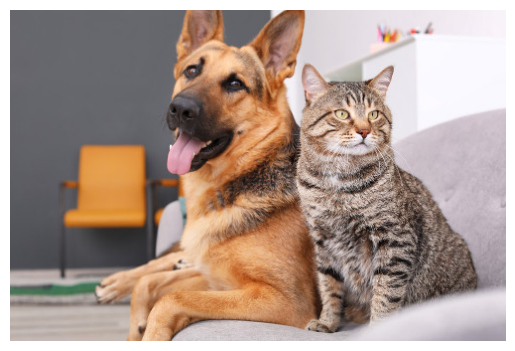

In [ ]:
import os
from PIL import Image


def get_image(path):
    with open(os.path.abspath(path), "rb") as f:
        with Image.open(f) as img:
            return img.convert("RGB")


img = get_image("cat_and_dog1.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

Теперь нам нужно преобразовать это изображение в тензор PyTorch и нормализовать его для использования в нашей предварительно обученной модели.

In [ ]:
from torchvision import transforms

# resize & normalize


def get_input_transform():
    transform = transforms.Compose(
        [
            transforms.Resize(224),
            transforms.CenterCrop((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225),
            ),
        ]
    )
    return transform


# for get croped img from input tensor


def get_reverse_transform():
    transform = transforms.Compose(
        [
            transforms.Normalize(
                mean=(0.0, 0.0, 0.0), std=(1 / 0.229, 1 / 0.224, 1 / 0.225)
            ),
            transforms.Normalize(
                mean=(-0.485, -0.456, -0.406),
                std=(1.0, 1.0, 1.0),
            ),
            transforms.Lambda(lambda x: torch.permute(x, (0, 2, 3, 1))),
            transforms.Lambda(lambda x: x.detach().numpy()),
        ]
    )
    return transform


def get_input_tensors(img):
    transform = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transform(img).unsqueeze(0)


def get_crop_img(img_tensor):
    transform = get_reverse_transform()
    return transform(img_tensor)[0]


Загрузим предобученную модель ResNet18, доступную в PyTorch, и классы изображений из ImageNet.

In [ ]:
import torch
from torchvision import models
import json

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights="ResNet18_Weights.DEFAULT")

idx2label, cls2label, cls2idx = [], {}, {}
with open(os.path.abspath("/content/imagenet_class_index.json"), "r") as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    lable2idx = {class_idx[str(k)][1]: k for k in range(len(class_idx))}

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 85.9MB/s]


Получим предсказание. А после этого полученные нами прогнозы (логиты) пропустим через softmax, чтобы получить вероятности и метки классов для 5 лучших прогнозов.

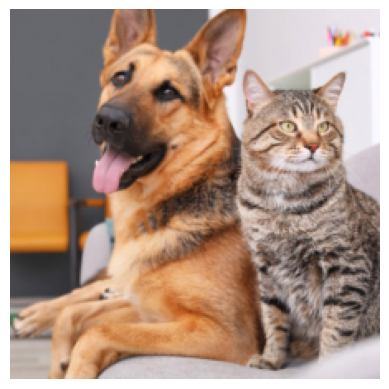

((0.4030773, 235, 'German_shepherd'),
 (0.095317766, 281, 'tabby'),
 (0.06907895, 282, 'tiger_cat'),
 (0.026926216, 285, 'Egyptian_cat'),
 (0.02285185, 811, 'space_heater'))

In [ ]:
import torch.nn.functional as F

img_t = get_input_tensors(img)
model = model.to(device)
model.eval()
logits = model(img_t.to(device))

probs = F.softmax(logits, dim=1)
probs5 = probs.topk(5)
plt.imshow(get_crop_img(img_t))
plt.axis("off")
plt.show()
tuple(
    (p, c, idx2label[c])
    for p, c in zip(
        probs5[0][0].detach().cpu().numpy(), probs5[1][0].detach().cpu().numpy()
    )
)

(tabby — это тоже кошка)

Применим LIME:

In [ ]:
!pip install -q lime

LIME генерирует массив изображений из исходного входного изображения.

Таким образом, нам нужно предоставить конструктору:
1. Исходное изображение в виде массива numpy.
2. Функцию классификации, которая будет принимать массив искаженных изображений в качестве входных данных и генерировать вероятности для каждого класса для каждого изображения в качестве выходных данных.

Поэтому потребуется вспомогательная функция для обработки пакета изображений в соответствии с API LIME.

In [ ]:
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def batch_predict(images):  # images are numpy arrays
    model.eval()
    transform = get_input_transform()
    batch = torch.stack(tuple(transform(Image.fromarray(i)) for i in images), dim=0)

    model.to(device)
    batch = batch.to(device)

    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

Создадим экзепляр `ImageExplainer` и сгенерируем объект `explanation`. У `LimeImageExplainer` есть особенность: он работает только с `numpy.array` и 3-хканальными изображениями.

In [ ]:
import lime
from lime import lime_image

img_t = get_input_tensors(img)

explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
    np.array(255 * get_crop_img(img_t)).astype(
        np.uint8
    ),  # LIME assume that input is a numpy array :(
    batch_predict,  # classification function
    top_labels=5,
    hide_color=0,
    num_samples=1000,  # number of images that will be sent to classification function
    random_seed=42,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

Выведем top-5 предсказаний, сделанных через LIME.

P.S. Они не обязаны совпадать с предсказаниями для картинки без изменений.

In [ ]:
for i, id in enumerate(explanation.top_labels):
    print(i, idx2label[id])

0 German_shepherd
1 tabby
2 tiger_cat
3 Egyptian_cat
4 space_heater


Воспользуемся маской на изображении и посмотрим области, которые дают лучший прогноз.

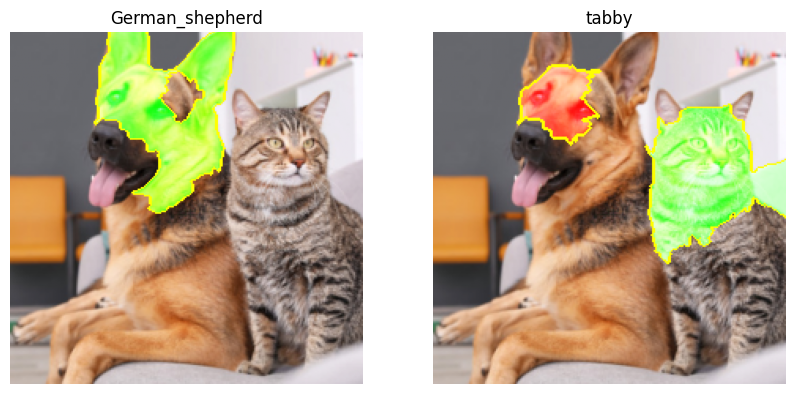

In [ ]:
from skimage.segmentation import mark_boundaries

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

for i, id in enumerate(explanation.top_labels[:2]):
    temp, mask = explanation.get_image_and_mask(
        id, positive_only=False, num_features=5, hide_rest=False
    )
    img_boundry = mark_boundaries(temp, mask)
    ax[i].imshow(img_boundry)
    ax[i].set_title(idx2label[id])
    ax[i].axis("off")
    # number of clusters to be shown in the image: num_features=5
    # show or not negatively impacting clusters: positive_only=False
    # first 5 may be only positive

Зеленым цветом обозначена область наивысшего прогноза, оранжевым — области, которые меньше всего соответствуют нашему прогнозу. При `positive_only=False` будут показаны только границы.

## SHAP (SHapley Additive exPlanations)

###Принцип работы

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/shap_scheme.png" alt="alttext" width="600"/></center>


Цель [**SHAP** 📚[book]](https://christophm.github.io/interpretable-ml-book/shap.html) — объяснить предсказание объекта $x$ путем **вычисления вклада каждого признака** в предсказание. Для этого вычисляются SHAP-значения, основанные на **значениях Шепли** из **теории игр**.

**SHAP** рассматривает объясняемую **модель как игру**, а **признаки**, используемые в обучении, как **коалицию игроков**. **SHAP-значения** говорят нам, как **справедливо распределить "выигрыш" между игроками** — это вклад, который каждый признак вносит в предсказание модели.





Рассмотрим на примере, как оценивается вклад игроков в общий выигрыш с помощью значений Шепли.

Пусть у нас есть уличная музыкальная группа из трех участников: барабанщика, гитариста и солиста. Они выступают на улице и собирают деньги в шляпу. Музыканты хотят оценить, **какой вклад в заработок привносит каждый участник группы**.

Для этого можно устроить эксперимент: несколько вечеров подряд группа будет выступать для публики **в разных комбинациях состава участников** (на иллюстрации все комбинации изображены в виде вершин графа и пронумерованы, ребра графа обозначают добавление участника в состав):
* пустое множество участников (пустая шляпа на улице, вершина $1$),
* все участники по одному (вершины $2$–$4$),
* все участники по двое (вершины $5$–$7$),
* полный состав из трех музыкантов (вершина $8$).

<center>
<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/shap_features_graph.png" alt="alttext" width="550"/>
</center>

Для простоты представим, что каждый вечер тот или иной состав группы
оценивается одной и той же публикой. Оценкой является заработок за вечер. Музыканты поиграли по такой схеме все восемь вечеров и зафиксировали заработок за каждый вечер.

<center>
<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/shap_predictions_graph.png" alt="alttext" width="550"/>
</center>

Теперь в каждой вершине графа находится оценка того или иного состава группы публикой.

Зная оценки всех возможных комбинаций состава этой группы, мы можем посчитать вклад каждого участника в итоговый заработок.

Вклад участника в заработок вычисляется на основании так называемых **маржинальных вкладов** *(marginal contribution, MC)*.

**Маржинальный вклад игрока** — это **разница** между заработком состава, **включающим данного игрока**, и заработком состава **без данного игрока**.

В данном случае можно рассчитать маржинальный вклад для игрока как разницу оценок вершин, соединенных ребром в графе.

Например, маржинальный вклад барабанщика по сравнению с пустой группой
$\{∅\}$ рассчитывается следующим образом (см. вершины $2$ и $1$):


$$ \large \text{MC}_{🥁,\{∅\}}= \text{Earning}_{\{🥁\}}\ - \text{Earning}_{\{∅\}}=  4\ 000 - 0 = 4\ 000$$

А маржинальный вклад солиста при добавлении его в пару к гитаристу будет равен (см. вершины $7$ и $3$):

$$ \large \text{MC}_{🎤,\{🎸\}}= \text{Earning}_{\{🎸🎤\}}\ \ - \text{Earning}_{\{🎸\}}\ =  9\ 500 - 4\ 800 = 4\ 700$$

Для того, чтобы **оценить итоговый вклад барабанщика** в оценку всей группы публикой, нужно учесть его **маржинальные вклады** во все комбинации, **где он участвовал** (в графе выделены соответствующие вершины):

<center>
<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/shap_estimation_important_features.png" alt="alttext" width="550"/>
</center>

SHAP-значение для барабанщика в этой группе является общим вкладом игрока в заработок и вычисляется как **взвешенная сумма его маржинальных вкладов**:

$$ \large \text{SHAP}_{🥁}=w_1\cdot \text{MC}_{🥁,\{\emptyset\}}+w_2\cdot \text{MC}_{🥁,\{🎸\}}+w_3\cdot \text{MC}_{🥁,\{🎤\}}+w_4\cdot \text{MC}_{🥁,\{🎸🎤\}} $$

Веса определяются согласно правилу: сумма весов маржинальных вкладов для каждого уровня графа должна быть равной 1.

Таким образом, нетрудно рассчитать веса маржинальных вкладов барабанщика:
* первый уровень содержит $3$ ребра, каждое из которых будет иметь вес $\dfrac{1}{3}$
* второй уровень содержит $6$ ребер, каждое из которых будет иметь вес $\dfrac{1}{6}$
* третий уровень содержит $3$ ребра, каждое из которых будет иметь вес $\dfrac{1}{3}$

Таким образом: $\displaystyle w_1=w_4=\frac{1}{3}, \; w_2=w_3=\frac{1}{6}$.

**В этой аналогии:**
* конкретный музыкальный коллектив — это один объект выборки,
* музыканты — это признаки,
* публика — это модель,
* заработок группы (оценка группы публикой) — предсказание модели (оценка объекта моделью).

Однако эта аналогия в случае моделей машинного обучения требует дополнительного пояснения. В примере с музыкальной группой мы использовали одну модель (публику) для оценки разных комбинаций признаков (разных составов группы).

Отсутствие какого-то игрока в группе означает отсуствие признака в признаковом описании объекта. Большинство моделей ML не могут работать с пропущенными значениями (то есть с признаковыми описаниями различной длины). Поэтому для получения оценок придется всякий раз **обучать модель заново на новом подмножестве признаков** (сохраняя гиперпараметры модели и набор обучающих объектов).

Для получения предсказания модели для пустого множества признаков может быть использовано, например, среднее значение целевой переменной по обучающей выборке.




### Kernel SHAP

У описанного выше метода есть недостаток: нам нужно обучить огромное количество моделей. Для всего 10-ти признаков это $2^{10} = 1024$ модели.

На помощь нам приходит статья [A Unified Approach to Interpreting Model Predictions 🎓[arxiv]](https://arxiv.org/pdf/1705.07874.pdf). В ней введено понятие **аддитивного метода атрибуции признаков** в котором в качестве “стеклянного ящика” используется функция бинарных переменных (есть признак/нет признака):

$$\large g(z') = \phi_0 +\sum_{i=1}^M\phi_i z_i'$$

где $z'\in\{0,1\}^M$ — вектор из $0$ и $1$ длины $M$: $0$ — отсутсвие признака, $1$ — наличие признака, $M$ — количество упрощенных признаков (например, суперпикселей для изображения). $ϕ_i$ — вклад (важность) $i$-того упрощенного признака.

Для адекватного описания работы модели данный метод должен удовлетворять трем свойствам:
1. **Локальная точность** — результат модели объяснения $g(x’)$ должен совпадать с результатом оригинальной модели $f(x):$

$$\large f(x)=g(x'),$$

где
* $x' = \{x_1, x_2, ...,x_M\}$ — упрощенные признаки объекта (например, суперпиксели для изображения), вектор $z’$ выше характеризует присутствие/отсутствие этих признаков.

*  $x$ — оригинальный набор признаков объекта (например: значения RGB пикселей изображения).

* Упрощенный набор признаков соответствует оригинальному набору:

$$\large x=h_x(x')$$


2. **Отсутствие** — если признак отсутствует, он вносит нулевой вклад:

$$\large x_i = \text{None} \to \phi_i = 0$$

3. **Консистентность** — если модель $f$ изменяется таким образом $f'$, что вклад некоторых упрощенных признаков $\phi_i$ увеличивается или остается прежним, независимо от вклада других признаков, то выход модели не может уменьшиться:

$$\large \phi_i(f', x) \geq \phi_i(f, x) \to f'_x(z') - f'_x(z'\verb!\!i) \geq f_x(z') - f_x(z'\verb!\!i),$$


> где $z'\verb!\!i$ — это $z'$ при $z_i=0$.


В [статье 🎓[arxiv]](https://arxiv.org/pdf/1705.07874.pdf) показано, что единственным методом адитивной атрибуции, удовлетворяющим всем свойствам являются значения Шепли, которые можно записать, как:

$$\large \phi_i(f, x) = \sum_{z'⊆x'} \frac{|z|!(M-|z'|-1)!}{M!}[f_x(z')-f_x(z'\verb!\!i)]$$

Значения Шепли можно [получить 🎓[arxiv]](https://arxiv.org/pdf/1705.07874.pdf) (вывод есть в статье), используя **линейный LIME** 🍋:

$$\large \hat{g}=\underset{g\in G}{\mathrm{argmin}}L(f,g,\pi_{x'})+\Omega (g)$$

со следующими параметрами:

$$\large \Omega(g) = 0,$$

$$\large \pi_{x'}(z')=\frac{M-1}{C^{|z'|}_M|z'|(M-|z'|)},$$

$$\large L(f, g, \pi_{x'}) = \sum_{z' \in Z}[f(h^{-1}(z'))-g(z')]^2\pi_{x'}(z'),$$

где $|z'|$ — количество ненулевых элементов $z'$, $C^k_n$ — биномиальный коэффициент.

Такой метод расчета называется Kernel SHAP. Он позволяет не обучать огромное количество моделей и реализовать вычисление значений Шепли за конечное время. Именно так считаются значения Шепли в библиотеке SHAP.

### Пример для табличных данных (Boston Dataset)

Установим пакет SHAP:

In [ ]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.3 MB/s eta 0:00:00


Для примера скачаем датасет жилья Бостона (boston_dataset), в котором проанализируем зависимость цены на жилье от параметров жилья и района, в котором оно находится.

Разобьем данные на train и test и обучим Random Forest модель.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np


# load dataset
boston_dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/boston_dataset.csv",
    index_col=0,
)
x_data = boston_dataset.iloc[:, :-1]
y_data = boston_dataset["target"]

# Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

# Build the model with the random forest regression algorithm
rng = np.random.RandomState(42)
model = RandomForestRegressor(n_jobs=-1, max_depth=4, random_state=rng)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_jobs=-1,
                      random_state=RandomState(MT19937) at 0x79FE7045DA40)

Применим SHAP.

In [ ]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
explanations = explainer(x_test)

In [ ]:
print(type(explanations))

print(explanations)

<class 'shap._explanation.Explanation'>
.values =
array([[ 3.59513250e-01, -7.57494185e-04, -5.36065189e-03, ...,
         3.75769950e-02,  1.09907495e-02,  1.56735456e+00],
       [ 3.23542906e-01, -6.30312450e-02, -3.63459255e-02, ...,
         9.69022019e-03, -1.04828771e-03,  5.44875225e+00],
       [ 1.05924802e+00, -2.12919386e-03, -1.16701150e-02, ...,
        -2.49177497e-01,  5.58777181e-02, -4.13010066e+00],
       ...,
       [-9.90074478e-01, -2.18585538e-03, -1.43130276e-02, ...,
        -2.21104649e-01, -1.84161230e-01, -8.30349060e+00],
       [ 3.71187999e-01, -2.37094303e-03,  1.39199662e-02, ...,
        -3.90942703e-02,  1.69203421e-02,  7.06083619e-01],
       [ 3.61234522e-01, -2.37094303e-03, -3.34938142e-02, ...,
        -4.71612736e-02,  3.60390550e-02,  1.83550067e+00]])

.base_values =
array([22.8867698, 22.8867698, 22.8867698, 22.8867698, 22.8867698,
       22.8867698, 22.8867698, 22.8867698, 22.8867698, 22.8867698,
       22.8867698, 22.8867698, 22.8867698, 

**Force plot**

Хороший способ визуализировать вклад каждого признака в конкретный прогноз — использовать так называемый "график сил" (force plot).

В приведенном ниже примере показан график сил для первого объекта в тестовом наборе данных.

In [ ]:
# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction’s explanation
shap.plots.force(explanations[0])

* $f(x)$ — это прогноз модели по анализируемому объекту недвижимости. А "base value" — это средний прогноз по всему набору тестовых данных. Или, другими словами, это значение, которое можно было бы спрогнозировать, если бы мы не знали никаких характеристик текущего примера.

* Элементы, которые способствуют увеличению цены, показаны красным, а те, которые уменьшают — синим.

* Длина вектора — “сила” влияния. Численное значение (оно не совпадает с длиной) — важность признака. Из нашего анализа мы помним, что увеличение RM положительно влияет на предсказание, но для данного объекта RM маленькое, поэтому влияет на цену отрицательно.

**Waterfall plot**

Другой способ визуализации SHAP-объяснения для конкретного примера — так называемый "график-водопад" (waterfall plot). Фактически, это график сил, где стрелки, обозначающие сдвиг предсказания от базового значения за счет SHAP-значений, расположены одна под другой, начиная с самой длинной сверху.

In [ ]:
# visualize the first prediction's explanation using waterfall

shap.plots.waterfall(explanations[0])

Этот график объясняет движущие силы конкретного прогноза: влияние каждого отдельного признака (наименее значимые признаки объединяются в одну группу) представлено стрелками, которые перемещают предсказание влево и вправо, начиная с базового значения (внизу картинки).


Указанный выше пример приведен только для одного объекта.

Если мы возьмем много объяснений в виде графика сил, повернем их на 90 градусов, а затем сложим их по горизонтали, мы сможем увидеть объяснения для всего набора данных (в блокноте этот график является интерактивным):

In [ ]:
# load JS visualization code to notebook
shap.initjs()
# visualize the training set predictions
shap.force_plot(explanations)

* По оси $x$ — объекты, по оси $y$ — вклад признаков в предсказание для каждого объекта. Важно заметить, что объекты упорядочены по схожести, которая считается по расстоянию между объектами.
* Можно использовать выпадающее меню, чтобы посмотреть, как будет выглядеть график без упорядочивания или при упорядочивании по конкретному признаку.


**Bar plot**

Сводный график `shap.plots.bar` даст нам график важности признаков.

Признаки с высокой предсказательной способностью показаны вверху, а с низкой предсказательной силой — внизу.

In [ ]:
shap.plots.bar(explanations)

Обратите внимание, что, согласно SHAP, наименьшей предсказательной способностью обладают признаки **CHAS, ZN, RAD** и **INDUS**.

Здесь мы только что рассмотрели алгоритм TreeExplainer для интерпретации модели.

Вы можете изучить остальные алгоритмы: DeepExplainer, KernelExplainer, LinearExplainer и GradientExplainer.

### Пример NLP (перевод с английского на русский)

Рассмотрим пример интерпретации модели для предварительно обученной модели машинного перевода
[Machine Translation Explanations 🐾[git]](https://github.com/slundberg/shap/blob/master/notebooks/text_examples/translation/Machine%20Translation%20Explanations.ipynb). Для перевода будем использовать предобученную [модель-трансформер 🎓[arxiv]](https://arxiv.org/abs/1810.04805).

Используем одну из моделей [huggingface 🐾[git]](https://github.com/huggingface/transformers).

Модель: [Language Technology in Helsinki ✏️[blog]](https://blogs.helsinki.fi/language-technology/)

[[doc] 🛠️ Language Technology Research Group at the University of Helsinki](https://huggingface.co/Helsinki-NLP)

[[doc] 🛠️ Helsinki-NLP/opus-mt-en-ru](https://huggingface.co/Helsinki-NLP/opus-mt-en-ru)

In [ ]:
!pip install -q transformers[sentencepiece]

Загружаем модель.

Для этого используется класс `AutoModelForSeq2SeqLM`, на вход которому передается имя модели, а возвращает он объект соответствующего класса.

In [ ]:
import torch
import transformers
from transformers import AutoModelForSeq2SeqLM
from IPython.display import clear_output

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

lang = "en"
target_lang = "ru"
model_name = f"Helsinki-NLP/opus-mt-{lang}-{target_lang}"

# Download the model and the tokenizer
# can also try translation with different pre-trained models

# It's a Factory pattern
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
model.to(device)
clear_output()
print(type(model))

<class 'transformers.models.marian.modeling_marian.MarianMTModel'>


В данном случае нам вернулся объект типа `MarianMT` [🛠️[doc]](https://huggingface.co/transformers/model_doc/marian.html).



Теперь создадим [токенайзер 🛠️[doc]](https://huggingface.co/transformers/main_classes/tokenizer.html).

Как мы уже обсуждали, токенайзер преобразовывает слова и знаки препинания из исходного текста в токены, которые можно подать на вход модели. В данном случае возвращаются id. При этом не всегда одно слово преобразовывается в один токен, иногда слово разбивается по слогам на несколько токенов.

Токенайзер создается с помощью класса `AutoTokenizer` по имени модели.

In [ ]:
!pip install -q sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 11.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

clear_output()

print(type(tokenizer))

input = tokenizer("Hello world!", return_tensors="pt")
print(input)

translated = model.generate(
    **tokenizer("Hello world!", return_tensors="pt").to(device), max_new_tokens=512
)
# ** -  is dictionary unpack operator
# https://pavel-karateev.gitbook.io/intermediate-python/sintaksis/args_and_kwargs

<class 'transformers.models.marian.tokenization_marian.MarianTokenizer'>
{'input_ids': tensor([[ 160, 5270,  564,   56,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}


Теперь переведем целую фразу и проанализируем, как выход модели связан со входом.

Для этого создадим объект `shap.Explainer` [🛠️[doc]](https://shap.readthedocs.io/en/latest/generated/shap.Explainer.html), который в данном случае инициализируется экземпляром модели и экземпляром токенайзера.



> *В действительности вторым параметром конструктора `shap.Explainer` не обязательно должен быть токенайзер. `shap.Explainer` принимает объект, поддерживающий интерфейс `masker`:*

> ```masked_args = masker(*model_args, mask=mask)```

> *Он используется для исключения части аргументов, и токенайзеры поддерживают этот интерфейс (`shap.TokenMasker`). Благодаря такому подходу SHAP может работать с различными моделями как с "черным ящиком".*





Вместо того, чтобы запускать саму модель, мы запускаем `Explainer` (неявно вызывая его метод `__call__`).


In [ ]:
import shap

# define the input sentences we want to translate
data = [
    "Transformers are a type of neural network architecture that have been gaining popularity. Transformers were developed to solve the problem of sequence transduction, or neural machine translation."
    "That means any task that transforms an input sequence to an output sequence. This includes speech recognition, text-to-speech transformation, etc.."
]

# we build an explainer by passing the model we want to explain and
# the tokenizer we want to use to break up the input strings
explainer = shap.Explainer(model, tokenizer, max_new_tokens=512)

# explainers are callable, just like models
explanation = explainer(data)
clear_output()

На выходе получаем объект класса `shap.Explanation` [🛠️[doc]](https://shap.readthedocs.io/en/latest/generated/shap.Explanation.html#shap-explanation), который содержит значения Шепли для каждого токена.

In [ ]:
print("Data", explanation.data)
print("SHAP values", explanation.values)
print("Shape", explanation.shape)  # 1, in, out

Data (array(['▁Trans', 'former', 's', '▁are', '▁a', '▁type', '▁of', '▁ne',
       'ural', '▁network', '▁architecture', '▁that', '▁have', '▁been',
       '▁gaining', '▁popularity', '.', '▁Trans', 'former', 's', '▁were',
       '▁developed', '▁to', '▁solve', '▁the', '▁problem', '▁of',
       '▁sequence', '▁trans', 'duct', 'ion', ',', '▁or', '▁ne', 'ural',
       '▁machine', '▁translation', '.', 'That', '▁means', '▁any', '▁task',
       '▁that', '▁transform', 's', '▁an', '▁input', '▁sequence', '▁to',
       '▁an', '▁output', '▁sequence', '.', '▁This', '▁includes',
       '▁speech', '▁recognition', ',', '▁text', '-', 'to', '-', 's', 'pe',
       'ech', '▁transformation', ',', '▁etc', '.', '.', ''], dtype=object),)
Shap values [[[ 1.39694700e+00  5.75616847e+00 -5.07417767e-01 ... -2.29897152e-02
    2.00847441e-02 -9.21574658e-03]
  [ 8.24752197e-01  2.37404535e+00  2.44451605e+00 ... -3.03489130e-03
    3.48355277e-03  1.34331505e-03]
  [ 6.21933990e-01  3.28069819e-01  2.84975874e-01 ...

Теперь, используя интерактивную визуализацию `shap.plots.text` [🛠️[doc]](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/text.html), можно отобразить результат объяснения.

In [ ]:
shap.initjs()
shap.plots.text(explanation)

Данная языковая модель предсказывает эмбеддинги — вектора, которые преобразуются в токены. При этом SHAP для оценки важности использует сжатые представления эмбеддингов. В данном случае наибольший интерес представляет не раскраска outputs (абсолютное значение сжатого представления эмбеддинга на выходе), а подсветка inputs, которая появляется, когда мы нажимаем на выходной токен. Она показывает, какие входные токены влияют на выходной.

### Пример NLP (абстрактное обобщение текста)

В этом примере мы рассмотрим интерпретацию составления резюме статьи с помощью предварительно обученной модели.

Используется датасет Extreme Summarization [XSum 🛠️[doc]](https://huggingface.co/sshleifer/distilbart-xsum-12-6).

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-xsum-12-6")
model = AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-xsum-12-6").to(
    device
)


dataset = load_dataset("xsum", split="train", trust_remote_code=True)  # load dataset
s = dataset["document"][0:1]  # slice inputs from dataset to run model inference on
explainer = shap.Explainer(model, tokenizer)  # create an explainer object
explanation = explainer(s)  # Compute shap values
clear_output()

In [ ]:
shap.initjs()
shap.plots.text(explanation)  # Visualize shap explanations

# Градиентные методы

## Vanilla Gradient

### Идея метода

Имея информацию о структуре модели, можно использовать градиент, чтобы понять, как входы связаны с выходом.

Градиент указывает направление возрастания функции. Если мы выберем  **logit, соответствующий метке наиболее вероятного класса**, и посчитаем для него **градиент по исходному изображению**, мы можем узнать, какие пиксели нужно “усилить”, чтобы модель была более уверена в ответе.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/vanilla_gradient_idea.png" width="800"></center>

Тут важно заметить, что пример из статьи на картинке выше — это **cherry picked** (специально отобранный пример, для которого данный метод дает хороший результат). Давайте посмотрим на нашей картинке.

###Пример изображения (ResNet18)

Загрузим изображение

In [ ]:
!wget -q 'https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/cat_and_dog1.jpg' -O cat_and_dog1.jpg
!wget -q 'https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/imagenet_class_index.json' -O imagenet_class_index.json

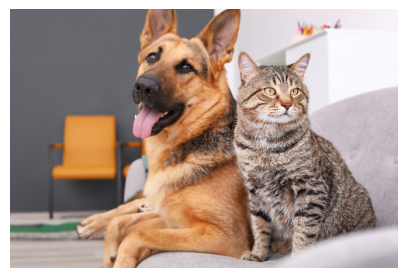

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image


def get_image(path):
    with open(os.path.abspath(path), "rb") as f:
        with Image.open(f) as img:
            return img.convert("RGB")


img = get_image("cat_and_dog1.jpg")
plt.rcParams["figure.figsize"] = (5, 5)
plt.imshow(img)
plt.axis("off")
plt.show()

Теперь нам нужно преобразовать это изображение в тензор PyTorch, а также его нормализовать для использования в нашей предварительно обученной модели.

In [ ]:
from torchvision import transforms

# resize & normalize


def get_input_transform():
    transform = transforms.Compose(
        [
            transforms.Resize(224),
            transforms.CenterCrop((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225),
            ),
        ]
    )
    return transform


# for get croped img from input tensor


def get_reverse_transform():
    transform = transforms.Compose(
        [
            transforms.Normalize(
                mean=(0.0, 0.0, 0.0), std=(1 / 0.229, 1 / 0.224, 1 / 0.225)
            ),
            transforms.Normalize(
                mean=(-0.485, -0.456, -0.406),
                std=(1.0, 1.0, 1.0),
            ),
            transforms.Lambda(lambda x: torch.permute(x, (0, 2, 3, 1))),
            transforms.Lambda(lambda x: x.detach().numpy()),
        ]
    )
    return transform


def get_input_tensors(img):
    transform = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transform(img).unsqueeze(0)


def get_crop_img(img_tensor):
    transform = get_reverse_transform()
    return transform(img_tensor)[0]


Загрузим предобученную модель ResNet18, доступную в PyTorch, и классы изображений из ImageNet.

In [ ]:
import torch
from torchvision import models
import json

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights="ResNet18_Weights.DEFAULT")

idx2label, cls2label, cls2idx = [], {}, {}
with open(os.path.abspath("/content/imagenet_class_index.json"), "r") as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    lable2idx = {class_idx[str(k)][1]: k for k in range(len(class_idx))}

Получим предсказание. А после этого полученные нами прогнозы (logits) пропустим через softmax, чтобы получить вероятности и метки классов для 6 лучших прогнозов.

In [ ]:
print(type(img))
img_t = get_input_tensors(img)

model.to(device)
model.eval()
logits = model(img_t.to(device))

<class 'PIL.Image.Image'>


In [ ]:
import torch.nn.functional as F


def top_k_class(logits, k=6):
    prediction = F.softmax(logits, dim=1)
    top_props, top_inds = prediction.topk(k)

    for i in range(k):
        category_name = idx2label[top_inds[0][i].item()]
        score = top_props[0][i].item()
        print(f"{category_name} {top_inds[0][i].item()}: {100 * score:.1f}%")


top_k_class(logits)

German_shepherd 235: 40.3%
tabby 281: 9.5%
tiger_cat 282: 6.9%
Egyptian_cat 285: 2.7%
space_heater 811: 2.3%
malinois 225: 1.2%


Включаем расчет градиента для изображения. Делаем предсказание. Выбираем наиболее вероятный logit.

In [ ]:
img_t.requires_grad = True  # Tell pytorch to compute grads w.r.t. inputs too

logits = model(img_t.to(device))  # [1,1000] batch of one element, 1000 class scores
top_score, top_idx = logits[0].topk(1)  # Get id of class with best score
id = top_idx[0].item()

print(id, idx2label[id])  # Print the label this class

score = logits[:, id]  # Model output for particular class

235 German_shepherd


Для выхода модели, соответствующего нашему классу, рассчитываем градиент.

In [ ]:
# Compute gradients
score.backward(retain_graph=True)

# retain_grad = True is not nessesary
# But if we run this code second time, we got a torch error without it
# because pytorch want to accumulate gradients explicitly

print(img_t.grad.shape)

torch.Size([1, 3, 224, 224])


У входного тензора (изображения) появился градиент, который указывает на то, как каждый элемент повлиял на выход модели. Отобразим этот градиент.

In [ ]:
import numpy as np
from matplotlib import pylab as P


# Helper method to display grad
def grad_to_image(raw_grads, percentile=99):
    gradients = raw_grads.detach().cpu().numpy()
    gradients = np.transpose(gradients, (0, 2, 3, 1))[0]

    image_2d = np.sum(np.abs(gradients), axis=2)

    vmax = np.percentile(image_2d, percentile)
    vmin = np.min(image_2d)

    return np.clip((image_2d - vmin) / (vmax - vmin), 0, 1)


def plot_saliency_map(img_tensor, saliency_map):
    plt.rcParams["figure.figsize"] = (10, 5)
    plt.subplot(1, 2, 1)
    img = get_crop_img(img_t)
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(saliency_map, cmap=P.cm.gray, vmin=0, vmax=1)
    plt.axis("off")
    plt.show()

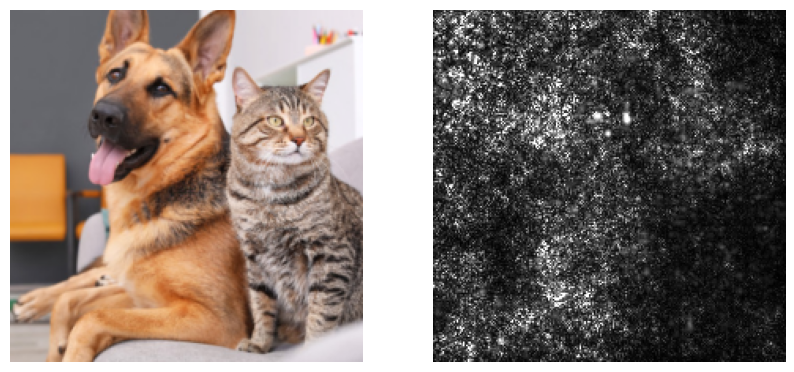

In [ ]:
saliency_map = grad_to_image(img_t.grad)
plot_saliency_map(img_t, saliency_map)

**Карта важности (saliency map)**, полученная таким образом, получается очень зашумленной.

### Проблема насыщения (saturation)

Одним из недостатков **карты важности** (saliency map), полученной методом **Vanilla Gradient**, является **проблема насыщения** (saturation). Простыми словами эту проблему можно сформулировать так: если какой-то **признак “идеально” характеризует объект** как принадлежащий к определенному классу, то **градиент** этого признака по логиту этого класса **будет нулевым**. То есть **Vanilla Gradient** будет **занижать важность очень хороших признаков**.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/saturation_problem.png" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1704.02685.pdf">Learning Important Features Through Propagating Activation Differences</a></em></center>


Более математично проблему можно описать так. Пусть $h$ — аналог активации некоторого нейрона, вычисляющийся как $$h=\max(0,1-i_1-i_2).$$

Если мы возьмем значения признаков $i_1=1$ и $i_2=1$, то на выходе получим значение $h=0$. Далее по очереди будем занулять значения каждого из признаков, внося таким образом пертурбации: $i_1=0$ и $i_2=1$,  $i_1=1$ и $i_2=0$. В обоих случаях выход по-прежнему будет $h=0$. Может сложиться обманчивое впечатление, что ни один из признаков не влияет на результат вычисления. Таким образом, мы столкнулись с проблемой, заключающейся в том, что подход, основанный на изменении признаков, будет занижать значимость признаков, чей вклад в результат достиг насыщения. Аналогично градиентные методы также будут недооценивать важность признаков при насыщении, поскольку градиент в данном случае будет равным 0.

Проблема насыщения не является редкой. В частности, с ней можно столкнуться в биологии при построении [моделей 🎓[article]](https://www.nature.com/articles/nmeth.3547), объясняющих вклад единичных мутаций на то или иное свойство организма, что связано с вырожденностью генетического кода.

### Adversarial attacks

Принцип взятия градиента по входу используется при **состязательных атаках (adversarial attacks)**.

Если не просто визуализировать градиент, а с его помощью менять изображение, усиливая определенную метку класса, то можно обмануть сеть и заставить ее неверно классифицировать картинку, незначительно поменяв ее.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/adversarial_attack.jpg" width="700"></center>



Подробнее:
* [[wiki] 📚 Adversarial machine learning](https://en.wikipedia.org/wiki/Adversarial_machine_learning)
* [[blog] ✏️ Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/adversarial.html)

## SmoothGrad


### Идея метода

Проблемой Vanilla Gradient Ascent является большая зашумленность карты важности. Было придумано несколько способов борьбы с этим, один из них был предложен в статье [SmoothGrad: removing noise by adding noise 🎓[arxiv]](https://arxiv.org/pdf/1706.03825.pdf).

Как вы можете догадаться из названия статьи, идея **SmoothGrad** заключается в **добавлении** к исходному изображению $x$ **гауссовского шума**:

$$\large x+\mathcal{N}(0, \sigma^2).$$

Для набора зашумленных изображений с помощью **Vanilla Gradient** рассчитываются **карты важности (saliency map)**:

$$\large M_c(x+\mathcal{N}(0, \sigma^2)).$$

**Карты важности**, полученные от зашумленных изображений, **усредняются**:

$$\large \text{SmoothGrad} = \frac{1}{n}\sum_{1}^{n}M_c(x+\mathcal{N}(0, \sigma^2)).$$






<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/smoth_grad.png" width="800">

<em>Source: <a href="https://arxiv.org/pdf/1706.03825.pdf">SmoothGrad: removing noise by adding noise
</a></em></center>


В статье рекомендуют выбирать $n = 50$ и $10–20\%$ шума. Уровень шума определяют как отношение:

$$\large \frac{\sigma}{x_{\max}-x_{\min}}.$$


###Пример изображения (ResNet18)

Для визуализации работы SmoothGrad используем [код 🐾[git]](https://github.com/PAIR-code/saliency/blob/master/Examples_pytorch.ipynb) c [сайта ✏️[blog]](https://pair-code.github.io/saliency/), посвященного [статье 🎓[arxiv]](https://arxiv.org/pdf/1706.03825.pdf).

In [ ]:
!pip install -q saliency

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 3.1 MB/s eta 0:00:00


У кода есть особенность: нужно написать функцию `call_model_function`, вызывающую модель.

При этом любое изображение, поданное в метод `GetMask` класса `GradientSaliency`, будет преобразовано в `np.array`. К тому же, размеры входного изображения и карты важности на выходе должны совпадать, что осложняет использование `torchvision.transforms`.

In [ ]:
import saliency.core as saliency
import numpy as np
from PIL import Image


model = models.resnet18(weights="ResNet18_Weights.DEFAULT")


def call_model_function(img, call_model_args=None, expected_keys=None):
    img_t = torch.tensor(np.transpose(img, (0, 3, 1, 2)))
    transform = transforms.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    img_t = transform(img_t)
    img_t.requires_grad_(True)

    model.to(device)
    model.eval()
    logits = model(img_t.float().to(device))

    top_score, top_idx = logits[0].topk(1)  # Get id of class with best score
    target_class_idx = top_idx[0].item()

    output = logits[:, target_class_idx]
    grads = torch.autograd.grad(
        output, img_t, grad_outputs=torch.ones_like(output)
    )  # output[:, target_class_idx]
    grads = torch.movedim(grads[0], 1, 3)
    gradients = grads.detach().numpy()
    return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}

Получаем Vanilla Gradient, рассчитанный для исходного изображения с помощью установленной библиотеки, и результат  SmoothGrad.

In [ ]:
img = get_image("cat_and_dog1.jpg")
img_t = get_input_tensors(img)
img_arr = get_crop_img(img_t)

gradient_saliency = saliency.GradientSaliency()

vanilla_mask_3d = gradient_saliency.GetMask(img_arr, call_model_function)
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(img_arr, call_model_function)

# Call the visualization methods to convert the 3D tensors to 2D grayscale.
vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_mask_3d)
smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

Визуализируем результат:

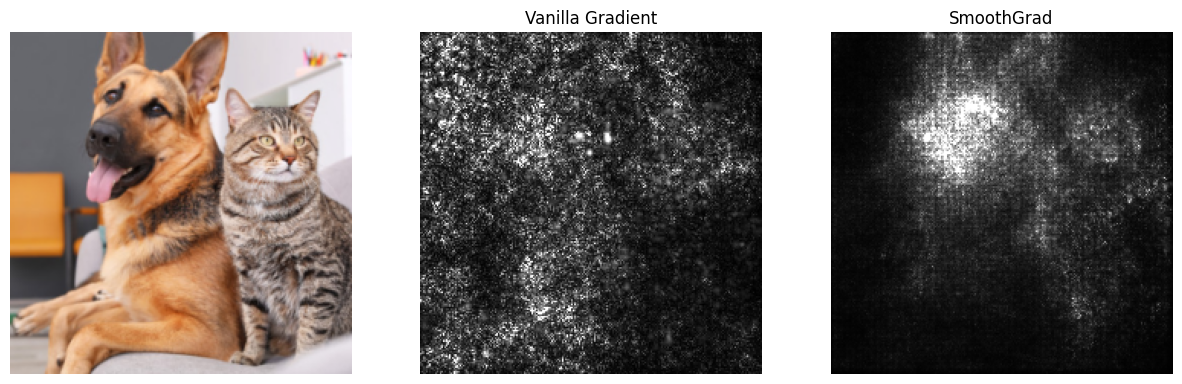

In [ ]:
from matplotlib import pylab as P


def ShowGrayscaleImage(im, title="", ax=None):
    if ax is None:
        P.figure()
    P.axis("off")
    P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
    P.title(title)


# Set up matplot lib figures.
plt.rcParams["figure.figsize"] = (15, 5)

plt.subplot(1, 3, 1)
plt.imshow(img_arr)
plt.axis("off")

ShowGrayscaleImage(
    vanilla_mask_grayscale, title="Vanilla Gradient", ax=P.subplot(1, 3, 2)
)
ShowGrayscaleImage(smoothgrad_mask_grayscale, title="SmoothGrad", ax=P.subplot(1, 3, 3))

##Integrated Gradients

### Идея метода

Следующий метод, который мы посмотрим, называется **Integrated Gradients**. Он напоминает **SmoothGrad** тем, что мы намеренно "портим" изображения. Давайте разберемся, как он работает.

В методе **Integrated Gradients** мы выбираем **опорное изображение** $x'$. В качестве опорного изображения используется черный фон (все нули по RGB-каналам). Оцениваемое изображение $x$ примешивают к опорному изображению $x’$ с пропорцией $\alpha$:

$$\large x'+\alpha(x-x')$$

Таким образом мы портим изображение и постепенно его восстанавливаем.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/IG_fireboat_1.png" width="900">

<em>Source: <a href="https://www.tensorflow.org/tutorials/interpretability/integrated_gradients">Tensorflow tutorials: Integrated gradients
</a></em></center>

Для смеси изображений считается **Vanilla Gradient**:

$$\large M_c(x'+\alpha(x-x'))$$

Формула, лежащая в основе **Integrated Gradients**, была предложена в [статье 🎓[arxiv]](https://arxiv.org/pdf/1703.01365.pdf). Это — интегральное значение градиента при восстановлении изображения.

$$\large \text{IntegratedGrads}(x) = (x-x')\cdot\int_{\alpha=0}^1 M_c(x'+\alpha(x-x'))dα$$

Множитель $(x-x)’$ появился, т.к. изначально градиент был по $dx = (x-x’)d\alpha$.

В расчетах интеграл аппроксимируется суммой:

$$\large \text{IntegratedGrads}(x) \approx (x-x')\cdot\sum_{k=1}^m M_c(x'+\frac{k}{m}(x-x'))\cdot\frac{1}{m}$$

Значение $m$ выбирают в диапазоне от $20$ до $300$.

Пример результата:

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/IG_fireboat.png" width="500">

<em>Source: <a href="https://www.tensorflow.org/tutorials/interpretability/integrated_gradients">Tensorflow tutorials: Integrated gradients
</a></em></center>

Integrated Gradients частично решает проблему насыщения за счет изменения изображения.

###Пример изображения (ResNet18)

In [ ]:
! pip install -q captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.5 MB/s eta 0:00:00


In [ ]:
output = model(img_t.to(device))
output = F.softmax(output, dim=1)
prediction_score, pred_label_idx = torch.topk(output, 1)

pred_label_idx.squeeze_()
predicted_label = idx2label[pred_label_idx.item()]
print("Predicted:", predicted_label, "(", prediction_score.squeeze().item(), ")")

Predicted: German_shepherd ( 0.4030771553516388 )


In [ ]:
from captum.attr import IntegratedGradients


integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(
    img_t.to(device), target=pred_label_idx, n_steps=200
)

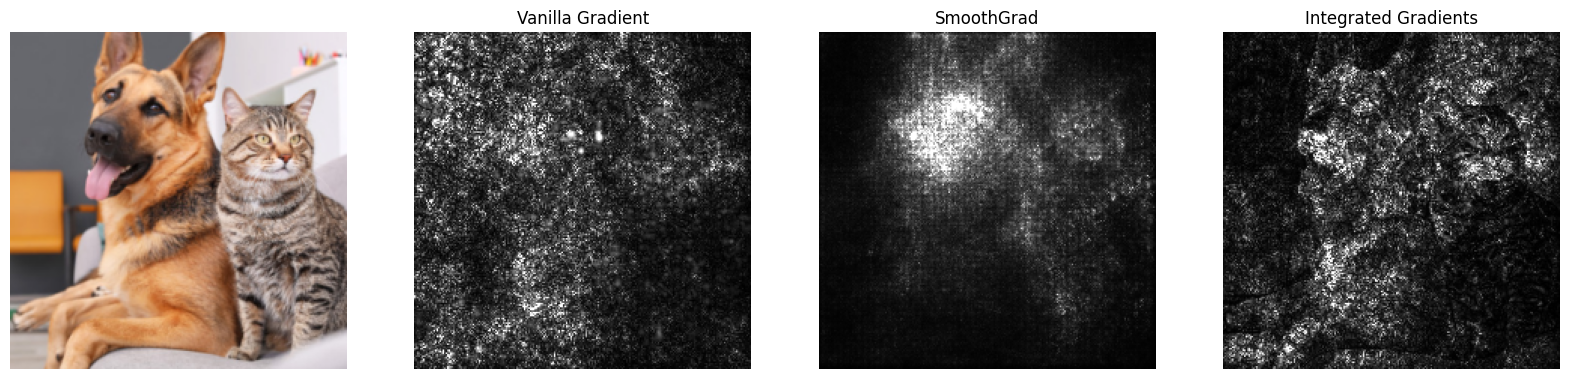

In [ ]:
saliency_map = grad_to_image(attributions_ig)

# Set up matplot lib figures.
plt.rcParams["figure.figsize"] = (20, 5)

plt.subplot(1, 4, 1)
plt.imshow(img_arr)
plt.axis("off")

ShowGrayscaleImage(
    vanilla_mask_grayscale, title="Vanilla Gradient", ax=P.subplot(1, 4, 2)
)
ShowGrayscaleImage(smoothgrad_mask_grayscale, title="SmoothGrad", ax=P.subplot(1, 4, 3))
ShowGrayscaleImage(saliency_map, title="Integrated Gradients", ax=P.subplot(1, 4, 4))

Пакет [captum 🛠️[doc]](https://captum.ai/docs/attribution_algorithms) можно использовать и для других модальностей данных, например, для [NLP BERT ✏️[blog]](https://captum.ai/tutorials/Bert_SQUAD_Interpret2). Там реализовано большое количество модификаций алгоритма Integrated Gradients и не только.

## Grad-CAM

Развитием **Gradient Ascent** для сверточных нейронных сетей **CNN** является метод **Grad-CAM** (Gradient-weighted Class Activation Mapping).

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/gradcam-architecture.png" alt="alttext" width="800"/></center>

<center><em>Source: <a href="https://learnopencv.com/intro-to-gradcam">GradCAM – Enhancing Neural Network Interpretability in the Realm of Explainable AI</a></em></center>

### Идея метода

После каждого **сверточного слоя** нейронной сети мы получаем **карты признаков**, сохраняющие информацию о **расположении объектов** на исходном изображении. При этом все значения признаков для одного канала получаются одним и тем же преобразованием исходного изображения (получаются применением одинаковых сверток с одинаковыми весами), то есть **один канал** — это **карта одного признака**.

Посмотрим на карты признаков для **ResNet18**. Для этого загрузим модель вместе с весами.

Нам интересны сложные признаки, которые выделяются на последних сверточных слоях. ResNet18 был обучен на ImageNet с размерами входного изображения $224\times224$. Посмотрим на размеры на выходе последнего сверточного слоя.

In [ ]:
from torchsummary import summary

model = models.resnet18(weights="ResNet18_Weights.DEFAULT")

summary(model.to("cpu"), (3, 224, 224), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

На последнем сверточном слое получаем $512$ карт признаков $7\times7$. Для их сохранения напишем hook, в котором будем сохранять значения активации на выходе модели.


In [ ]:
from collections import defaultdict


def get_forward_hook(history_dict, key):
    def forward_hook(self, input_, output):
        history_dict[key] = output.detach().clone()

    return forward_hook


def register_model_hooks(model):
    hooks_data_history = defaultdict(list)
    forward_hook = get_forward_hook(hooks_data_history, "feature_map")
    model._modules["layer4"].register_forward_hook(forward_hook)
    return hooks_data_history

Предобработаем картинку: приведем к размеру $224\times224$ и нормализуем изображение в соответствии со статистикой ImageNet.

In [ ]:
img_t = get_input_tensors(img)

Пропустим картинку через сеть и сохраним значения активаций.

In [ ]:
model = model.eval()
history = register_model_hooks(model)
output = model(img_t)

print(history["feature_map"].shape)

torch.Size([1, 512, 7, 7])


Нарисуем первые 6 карт признаков. Чтобы растянуть карты по размеру изображения, используем `extent` и `interpolation='bilinear'`.

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img_arr)
    plt.imshow(
        history["feature_map"][0][i],
        alpha=0.6,
        extent=(0, 224, 224, 0),
        interpolation="nearest",
        cmap="jet",
        )
    plt.axis("off")

plt.show()

Вспомним предсказание модели.

In [ ]:
import torch.nn.functional as F

number_of_top_classes = 6

prediction = F.softmax(output, dim=1)
top_props, top_inds = prediction.topk(number_of_top_classes)


for i in range(number_of_top_classes):
    category_name = idx2label[top_inds[0][i].item()]
    score = top_props[0][i].item()
    print(f"{category_name} {top_inds[0][i].item()}: {100 * score:.1f}%")

German_shepherd 235: 36.6%
tabby 281: 6.3%
tiger_cat 282: 3.8%
space_heater 811: 3.2%
Egyptian_cat 285: 2.6%
malinois 225: 1.4%


Мы смогли понять, к какой части изображения относятся те или иные признаки. Теперь попробуем понять, как они соотносятся с классом. Мы помним, что градиент указывает направление возрастания функции. Если мы выберем логит, соответствующий метке класса, и посчитаем для него градиент, то мы сможем увидеть, какие признаки имеют положительные значения (при их увеличении модель будет больше уверена в оценке).

Напишем хук для сохранения значения градиента. Мы смотрим значения градиента на выходе слоя перед `AdaptiveAvgPool2d`, поэтому сохраним только средние значения (значение градиента для карт признаков одного канала будет одинаковым).

In [ ]:
def get_backward_hook(history_dict, key):
    def backward_hook(self, grad_input_, grad_output):  # for tensors
        history_dict[key] = (
            grad_output[0].detach().clone().mean(dim=[2, 3], keepdim=True)
        )

    return backward_hook


def register_model_hooks(model):
    hooks_data_history = defaultdict(list)

    forward_hook = get_forward_hook(hooks_data_history, "feature_map")
    model._modules["layer4"].register_forward_hook(forward_hook)

    backward_hook = get_backward_hook(hooks_data_history, "weight")
    model._modules["layer4"].register_full_backward_hook(backward_hook)
    return hooks_data_history

Итоговая формула **Grad-CAM** (Class activation maps):

$$\large \text{CAM} = \text{ReLU}(\sum_{i=1}^{Nch}w_iA_i)$$

где $A_i$ — каналы карты признаков, $w_i$ — веса, полученные пропусканием градиента по логиту, соответствующему метке класса. $\text{ReLU}$ используется потому, что нам интересны только положительно влияющие на метку класса признаки.

Функция, рассчитывающая CAM:

In [ ]:
def get_cam_map(model, img, class_num):
    history = register_model_hooks(model)

    output = model.eval()(img)
    activation = history["feature_map"]

    output[0, class_num].backward()
    weight = history["weight"]

    cam_map = F.relu((weight[0] * activation[0]).sum(0)).detach().cpu()
    return cam_map

Визуализация важности признаков для top-6 классов:

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(6):
    cam_map = get_cam_map(model, img_t, top_inds[0][i])

    plt.subplot(2, 3, i + 1)
    plt.imshow(img_arr)
    plt.imshow(
        cam_map,
        alpha=0.6,
        extent=(0, 224, 224, 0),
        interpolation="nearest",
        cmap="jet",
        )
    plt.title(idx2label[top_inds[0][i].item()])
    plt.axis("off")

plt.show()

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(6):
    cam_map = get_cam_map(model, img_t, top_inds[0][i])

    plt.subplot(2, 3, i + 1)
    plt.imshow(img_arr)
    plt.imshow(
        cam_map,
        alpha=0.6,
        extent=(0, 224, 224, 0),
        interpolation="bilinear",
        cmap="jet",
        )
    plt.title(idx2label[top_inds[0][i].item()])
    plt.axis("off")

plt.show()

###Пример изображения (ResNet18)

Можно сделать все то же самое с помощью библиотеки  Grad-CAM.

In [ ]:
!pip install -q grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from pytorch_grad_cam import GradCAM

target_layers = [model._modules["layer4"]]

cam = GradCAM(model=model, target_layers=target_layers)

In [ ]:
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

plt.figure(figsize=(15, 10))

for i in range(6):
    target = [ClassifierOutputTarget(top_inds[0][i])]
    cam_map = cam(input_tensor=img_t, targets=target)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img_arr)
    plt.imshow(cam_map[0], alpha=0.6, interpolation="bilinear", cmap="jet")
    plt.title(idx2label[top_inds[0][i].item()])
    plt.axis("off")

plt.show()

В библиотеке также реализованы другие методы визуализации, например, Grad-CAM++, использующий производные второго порядка.

In [ ]:
from pytorch_grad_cam import GradCAMPlusPlus

target_layers = [model._modules["layer4"]]
cam_plus = GradCAMPlusPlus(model=model, target_layers=target_layers)

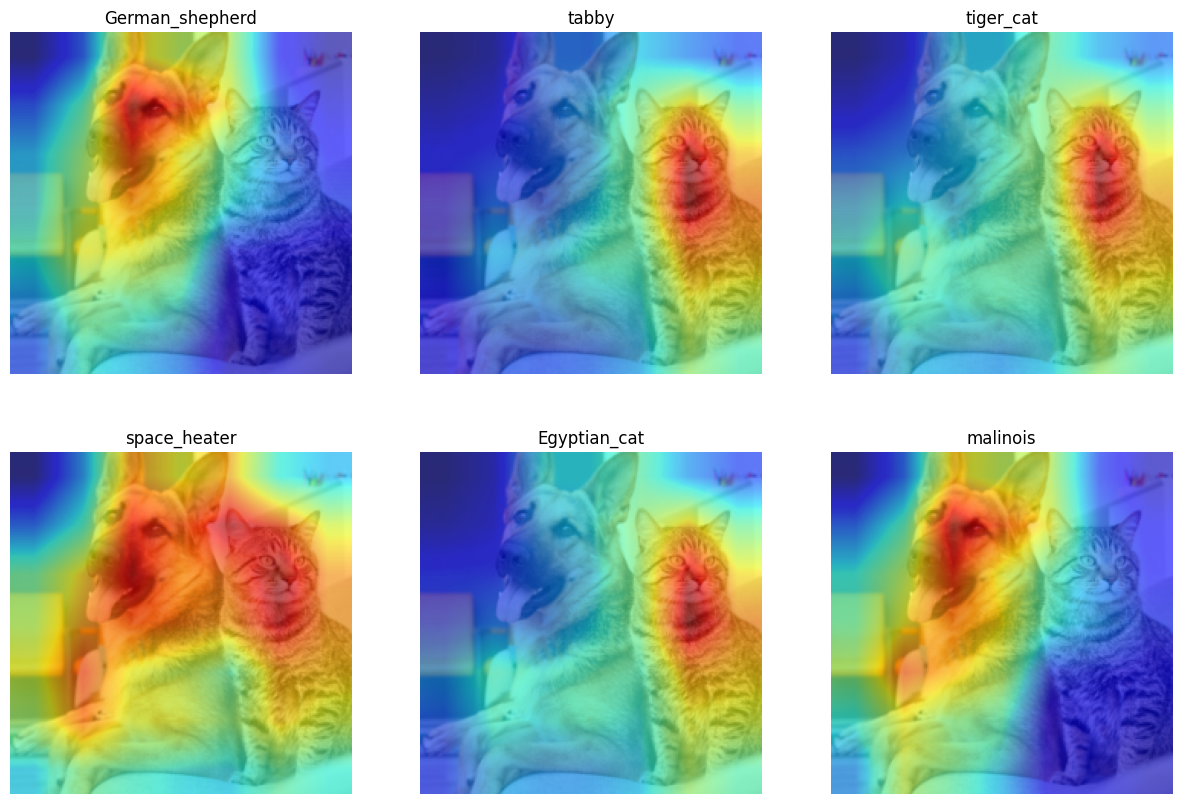

In [ ]:
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

plt.figure(figsize=(15, 10))

for i in range(6):
    target = [ClassifierOutputTarget(top_inds[0][i])]
    cam_map = cam_plus(input_tensor=img_t, targets=target)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img_arr)
    plt.imshow(cam_map[0], alpha=0.6, interpolation="bilinear", cmap="jet")
    plt.title(idx2label[top_inds[0][i].item()])
    plt.axis("off")

plt.show()

Grad-CAM++ для ряда изображений работает лучше Grad-CAM.

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/Grad_CAM_plus_plus.png" alt="alttext" width="600"/></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1710.11063.pdf">Grad-CAM++: Improved Visual Explanations for
Deep Convolutional Networks</a></em></center>

Подробнее о других методах: [Grad-Cam 🛠️[doc]](https://jacobgil.github.io/pytorch-gradcam-book/introduction.html).

## Критика градиентных методов

Градиентные методы имеют существенное преимущество перед SHAP и LIME: они вычисляются быстрее, чем методы, не зависящие от моделей. Но у них есть ряд недостатков. Недостаток в том, что в статьях, где предлагались такие методы, **качество работы оценивалось визуально**, “на глаз”.

Хорошим примером проблемы визуальной оценки является метод **Guided Backpropagation**, описанный в [статье 🎓[arxiv]](https://arxiv.org/pdf/1412.6806.pdf).

[[blog] ✏️ Объяснение метода и код](https://leslietj.github.io/2020/07/22/Deep-Learning-Guided-BackPropagation/).

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/Guided_Backpropagation.png" alt="alttext" width="600"/></center>

<center><em>Картинка получена применением модели ResNet18 и Guided Backpropagation</em></center>

Интуитивно нам кажется, что **Guided Backpropagation** дает хорошее объяснение работы модели, потому что она выделяет границы, по которым легко узнать объект. В статье [Sanity Checks for Saliency Maps 🎓[arxiv]](https://arxiv.org/pdf/1810.03292.pdf) показано, что данный метод инвариантен к рандомизации весов верхних слоев модели, что ставит под сомнение его способности объяснения работы модели.

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/guided_backprop_demo.png" alt="alttext" width="900"/></center>

<center><em>Показан результат Guided Backpropagation  при рандомизации слоев в модели Inception-v3, начиная с последнего.

Source: <a href="https://arxiv.org/pdf/1810.03292.pdf">Sanity Checks for Saliency Maps.</a></em></center>



В статье [Interpretation of Neural Networks is Fragile 🎓[arxiv]](https://arxiv.org/abs/1710.10547) было показано, что небольшое случайное возмущение, добавленное к картинке, не влияющее на результат предсказания, может существенно поменять карты важности, что является спорной критикой, потому что на результат работы нейросети такое возмущение тоже может повлиять:

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/criticism_grad_1.png" alt="alttext" width="500"/></center>

<center><em>Source: <a href="https://arxiv.org/abs/1710.10547">Interpretation of Neural Networks is Fragile</a></em></center>

В целом [остается проблема 🎓[arxiv]](https://arxiv.org/pdf/1912.01451.pdf) оценки качества Saliency Maps. Это не значит, что градиентные методы нельзя использовать. Это значит, что нужно использовать их с осторожностью.

# Методы, специфичные для трансформеров

В трансформерах есть механизм **self-attention**, который кажется естественным способом определить, какие токены текста/кусочки изображения имеют большую важность для предсказания.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/self_attention.png"  width="900"></center>

Это бы отлично работало, будь у нас только один блок **self-attention**, но архитектура трансформера состоит из **нескольких блоков кодера/декодера**, расположенных друг за другом. От слоя к слою за счет того же **self-attention** **информация в эмбеддингах перемешивается** сильнее и сильнее. Так, например, для классификации текста мы можем использовать эмбеддинг на выходе **BERT**, соответствующий `[CLS]` токену, в котором на входе **BERT** не было никакой информации о последующем тексте.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/transformer_text_translation_example.png" width="800"></center>

<center><em>Source: <a href="https://jalammar.github.io/illustrated-bert/">The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning)</a></em></center>

Кроме того, в стандартном блоке трансформера есть **residual соединения**. Из-за этого информация о токенах/патчах проходит не только через **attention**, но и через **residual соединения**.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L14/out/transformer_architecture.png" width="450"></center>

<center><em>Архитектура трансформера</em></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1706.03762.pdf"> Attention Is All You Need</a></em></center>

По этим причинам объяснение работы трансформера через attention — непростая задача.

**Предупреждение:** методы объяснения **attention** только частично объясняют работу трансформера, они  разнообразны и могут давать противоречивые результаты.

Давайте для начала немного поизучаем, как выглядят значения self-attention в трансформерах. Подгружаем библиотеку.

In [ ]:
!pip install -q transformers[sentencepiece]

Возьмем базовый русскоязычный разговорный [BERT от Deep Pavlov 🛠️[doc]](https://huggingface.co/DeepPavlov/rubert-base-cased-conversational), [обученный 🛠️[doc]](https://huggingface.co/blanchefort/rubert-base-cased-sentiment) для определения эмоциональной окраски коротких русских текстов. Загружаем токенизатор и модель. Ставим флаг `output_attentions=True`, чтобы модель возвращала значения attention.

In [ ]:
import transformers
from transformers import BertTokenizerFast, AutoModelForSequenceClassification

tokenizer = BertTokenizerFast.from_pretrained(
    "blanchefort/rubert-base-cased-sentiment",
)
model = AutoModelForSequenceClassification.from_pretrained(
    "blanchefort/rubert-base-cased-sentiment",
    output_attentions=True,  # for save attention
)

Готовим предложения.

In [ ]:
sentences = [
    "Мама мыла раму",
    "Фильм сделан откровенно плохо",
    "Максимально скучный сериал, где сюжет высосан из пальца",
    "Я был в восторге",
    "В общем, кино хорошее и есть много что пообсуждать",
]

tokens = [
    ["[cls]"] + tokenizer.tokenize(sentence) + ["[sep]"] for sentence in sentences
]

Посмотрим, как разбивается на токены предложение. На выходе токенизатора номера токенов.

In [ ]:
item = 0
print(f"Tokens: {tokens[item]}")
token_ids = [tokenizer.encode(sentence) for sentence in sentences]
print(f"Token ids: {token_ids[item]}")

Tokens: ['[cls]', 'Мама', 'мыла', 'раму', '[sep]']
Token ids: [101, 10871, 49053, 53954, 102]


Посмотрим на предсказания модели, чтобы проверить, насколько она адекватна.

In [ ]:
import torch


ans = {0: "NEUTRAL", 1: "POSITIVE", 2: "NEGATIVE"}

for item in range(5):
    input_ids = torch.tensor([token_ids[item]])
    model_output = model(input_ids)
    predicted = torch.argmax(model_output.logits, dim=1).numpy()
    print(f"Text: {sentences[item]}")
    print(f"Predict lable = {predicted}, {ans[predicted.item()]}")

Text: Мама мыла раму
Predict lable = [0], NEUTRAL
Text: Фильм сделан откровенно плохо
Predict lable = [2], NEGATIVE
Text: Максимально скучный сериал, где сюжет высосан из пальца
Predict lable = [2], NEGATIVE
Text: Я был в восторге
Predict lable = [1], POSITIVE
Text: В общем, кино хорошее и есть много что пообсуждать
Predict lable = [0], NEUTRAL


В данной модели 12 слоев (блоков трансформеров), поэтому модель возвращает кортеж из 12 тензоров. Каждый слой имеет 12 голов self-attention.

In [ ]:
item = 1
input_ids = torch.tensor([token_ids[item]])
model_output = model(input_ids)

attentions = model_output.attentions
print(f"Text: {sentences[item]}")
print(f"Tokens: {tokens[item]}")
print(f"Number of layers: {len(attentions)}")
print(
    f"Attention size: {attentions[0].shape} "
    "[batch x attention_heads x seq_size x seq_size]"
)

Text: Фильм сделан откровенно плохо
Tokens: ['[cls]', 'Фильм', 'сделан', 'откровенно', 'плохо', '[sep]']
Number of layers: 12
Attention size: torch.Size([1, 12, 6, 6]) [batch x attention_heads x seq_size x seq_size]


Преобразуем в однородный массив для удобства манипуляций.

Код этой части лекции основана на:
* [[git] 🐾 Attention flow](https://github.com/samiraabnar/attention_flow),
* [[arxiv] 🎓 Quantifying Attention Flow in Transformers (Abnar, Zuidema, 2020)](https://arxiv.org/pdf/2005.00928.pdf).


In [ ]:
import numpy as np


def to_array(attentions):
    attentions_arr = [attention.detach().numpy() for attention in attentions]
    return np.asarray(attentions_arr)[:, 0]


attentions_arr = to_array(attentions)
print(
    f"Shape: {attentions_arr.shape} " "[layers x attention_heads x seq_size x seq_size]"
)
print(f"Type: {type(attentions_arr)}, Dtype: {attentions_arr.dtype}")

Shape: (12, 12, 6, 6) [layers x attention_heads x seq_size x seq_size]
Type: <class 'numpy.ndarray'>, Dtype: float32


Посмотрим на **нулевую голову нулевого слоя**

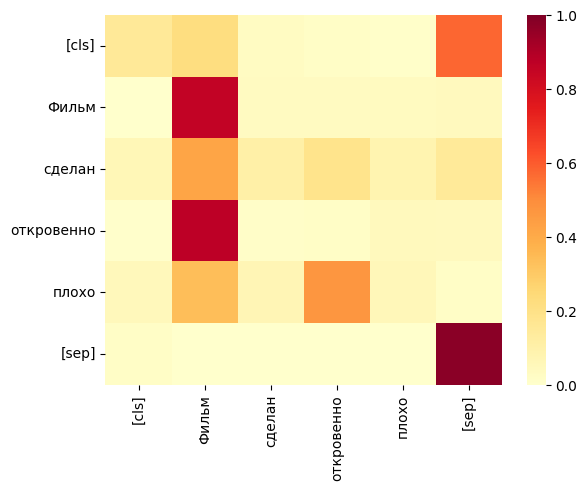

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x_ticks = tokens[item]
y_ticks = tokens[item]

sns.heatmap(
    data=attentions_arr[0][0],
    vmin=0,
    vmax=1,
    xticklabels=x_ticks,
    yticklabels=y_ticks,
    cmap="YlOrRd",
)

plt.show()

Тут по **оси x** — токены, **на** которые смотрит внимание, по **оси y** — токены, **куда** записывается результат прохождения слоя.

Так для слова “плохо” первая голова внимания первого слоя больше всего смотрит на слова “фильм” и “ откровенно”.

Для визуализации внимания можно использовать библиотеку [BertViz 🛠️[doc]](https://pypi.org/project/bertviz/):
* [[arxiv] 🎓 Visualizing Attention in Transformer-Based Language Representation Models (Vig, 2019)](https://arxiv.org/pdf/1904.02679.pdf),
* [[colab] 🥨 BertViz Interactive Tutorial](https://colab.research.google.com/drive/1hXIQ77A4TYS4y3UthWF-Ci7V7vVUoxmQ?usp=sharing).

In [ ]:
!pip install -q bertviz

Тут Layer — это выбор слоя, цвета — головы self-attention, слева — куда записывается, справа — на какие токены смотрит. Яркость соединяющих линий — величина attention (чем ярче, тем больше). Картину, аналогичную картине выше, можно получить, *дважды щелкнув на первый синий квадрат*.

In [ ]:
import bertviz
from bertviz import head_view

head_view(model_output.attentions, tokens[item])

<IPython.core.display.Javascript object>

Усредним значения по головам:

In [ ]:
attention_head_mean = attentions_arr.mean(axis=1)
print(f"{attention_head_mean.shape} [layers x seq_size x seq_size]")

(12, 6, 6) [layers x seq_size x seq_size]


Посмотрим на усредненное по головам внимание **на первом слое**:

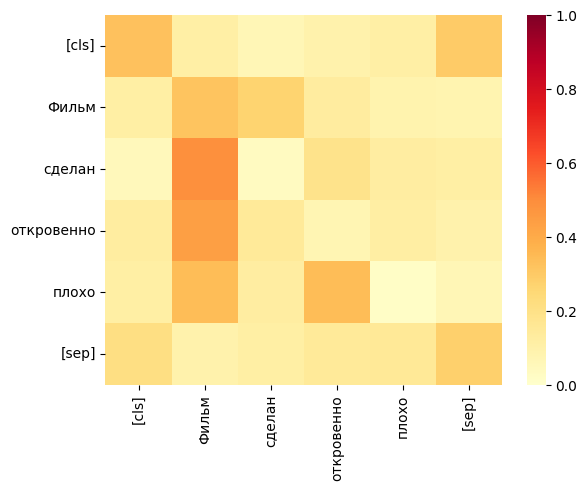

In [ ]:
x_ticks = tokens[item]
y_ticks = tokens[item]

sns.heatmap(
    data=attention_head_mean[0],
    vmin=0,
    vmax=1,
    xticklabels=x_ticks,
    yticklabels=y_ticks,
    cmap="YlOrRd",
)

plt.show()

И на **последнем слое**:

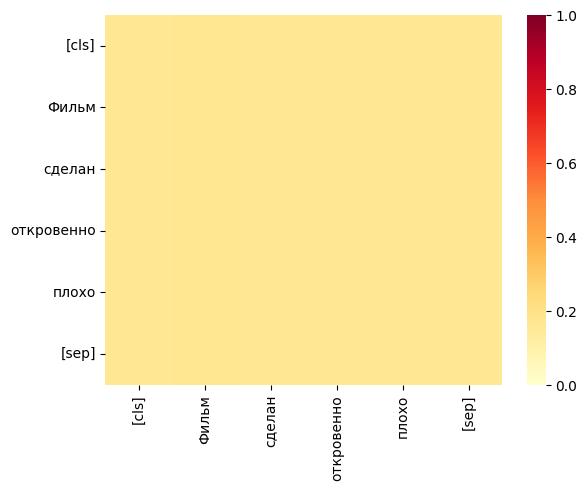

In [ ]:
x_ticks = tokens[item]
y_ticks = tokens[item]

sns.heatmap(
    data=attention_head_mean[-1],
    vmin=0,
    vmax=1,
    xticklabels=x_ticks,
    yticklabels=y_ticks,
    cmap="YlOrRd",
)

plt.show()

Видно, что на последнем слое внимание распределено между токенами практически равномерно.

Посмотрим на **значения внимания для записываемого в эмбеддинг [CLS] токена** (эмбеддинг с него используется для классификации).

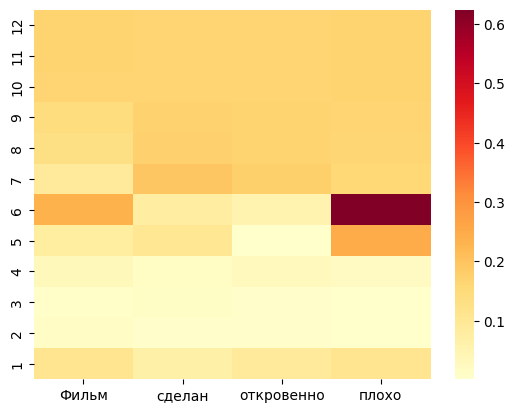

In [ ]:
x_ticks = tokens[item][1:-1]
y_ticks = [i for i in range(12, 0, -1)]

sns.heatmap(
    data=np.flip(attention_head_mean[:, 0, 1:-1], axis=0),
    xticklabels=x_ticks,
    yticklabels=y_ticks,
    cmap="YlOrRd",
)

plt.show()

Видно, что после 6-го слоя значения внимания выравниваются. Это связано с тем, что механизм **self-attention** смешивает информацию о токенах.

<font size="5">Residual connection</font>

Давайте сначала определимся, что делать с **residual соединениями**.

**Residual соединение** можно записать как

$$ \large V_{l+1} = V_l + W_{att}V_l,$$

где $W_{att}$ — матрица внимания, а $V_l$ — эмбеддинги.

После нормализации это можно переписать как

$$\large A=0.5W_{att}+0.5I,$$

где $I$ — единичная матрица.

[[arxiv] 🎓 Quantifying Attention Flow in Transformers (Abnar, Zuidema, 2020)](https://arxiv.org/pdf/2005.00928.pdf)

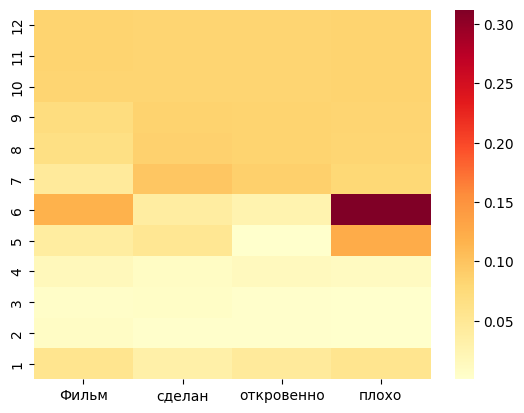

In [ ]:
def residual(attention_head_mean):
    attention_residual = 0.5 * attention_head_mean + 0.5 * np.eye(attention_head_mean.shape[1])[None, ...]
    return attention_residual

attention_res = residual(attention_head_mean)

x_ticks = tokens[item][1:-1]
y_ticks = [i for i in range(12, 0, -1)]

sns.heatmap(
    data=np.flip(attention_res[:, 0, 1:-1], axis=0),
    xticklabels=x_ticks,
    yticklabels=y_ticks,
    cmap="YlOrRd",
)

plt.show()

## Attention rollout
“Разворачивание внимания” (**Attention rollout**) — предложенный в [статье 🎓[arxiv]](https://arxiv.org/pdf/2005.00928.pdf) способ отслеживания информации, распространяемой от входного к выходному блоку, в котором значение внимания рассматривается как доля пропускаемой информации.  Доли информации перемножаются и суммируются. Итоговая формула — рекурсивное матричное перемножение.

\begin{align}
\widetilde{A}(l_i) = \left\{
\begin{array}{cl}
A(l_i)\widetilde{A}(l_{i-1}) & i>0 \\
A(l_i) & i = 0.
\end{array}
\right.
\end{align}



In [ ]:
def rollout(attention_res):
    rollout_attention = np.zeros(attention_res.shape)
    rollout_attention[0] = attention_res[0]
    n_layers = attention_res.shape[0]
    for i in range(1, n_layers):
        rollout_attention[i] = attention_res[i].dot(rollout_attention[i - 1])
    return rollout_attention

In [ ]:
rollout_attention = rollout(attention_res)

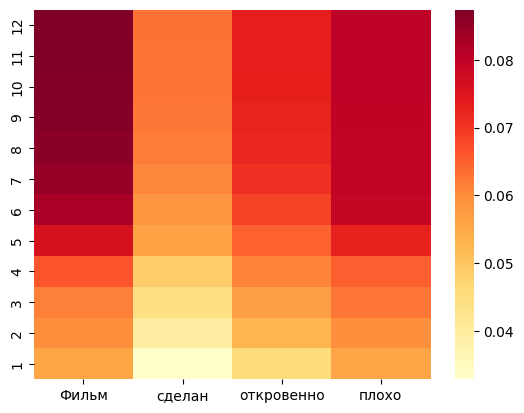

In [ ]:
x_ticks = tokens[item][1:-1]
y_ticks = [i for i in range(12, 0, -1)]

sns.heatmap(
    data=np.flip(rollout_attention[:, 0, 1:-1], axis=0),
    xticklabels=x_ticks,
    yticklabels=y_ticks,
    cmap="YlOrRd",
)

plt.show()

Реализации от HuggingFace:
* [[git] 🐾 Для ViT и картинок](https://huggingface.co/spaces/probing-vits/attention-rollout/tree/main)
* [[git] 🐾 На PyTorch Rollout для BERT и некоторых других методов](https://huggingface.co/spaces/amsterdamNLP/attention-rollout/tree/main)
* [[demo] 🎮 Attention Rollout — RoBERTa](https://huggingface.co/spaces/amsterdamNLP/attention-rollout)

## Attention Flow

Другим вариантом рассмотрения распространения внимания является **attention flow**. В нем трансформер представляют в виде направленного графа, **узлы** которого представляют собой **эмбеддинги** между слоями, а **ребра** — связи в виде **attention** с ограниченной емкостью (передающей способностью).

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L14/attention_flow.png" width="700">

<em>Source: <a href="https://github.com/samiraabnar/attention_flow/blob/master/bert_example.ipynb">Bert Example
</a></em></center>

В такой постановке задача нахождения роли токенов/частей изображения в результирующем эмбеддинге сводится к [задаче о максимальном потоке 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BE_%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%BC_%D0%BF%D0%BE%D1%82%D0%BE%D0%BA%D0%B5) (задача нахождения такого потока по транспортной сети, что сумма потоков в пункт назначения была максимальна). Это известная алгоритмическая задача, которую мы не будем разбирать в рамках этого курса.

* [[git] 🐾 Attention flow](https://github.com/samiraabnar/attention_flow)
* [[arxiv] 🎓 Quantifying Attention Flow in Transformers (Abnar, Zuidema, 2020)](https://arxiv.org/pdf/2005.00928.pdf)



## Gradient-weighted Attention Rollout

Метод, объединяющий GradCam и Attention Rollout, позволяет оценить положительный и отрицательный вклад токенов / частей изображения в итоговый результат.
* [[article] 🎓 Transformer Interpretability Beyond Attention Visualization (Chefer et.al., 2021)](https://openaccess.thecvf.com/content/CVPR2021/papers/Chefer_Transformer_Interpretability_Beyond_Attention_Visualization_CVPR_2021_paper.pdf)
* [[git] 🐾 Attention Rollout](https://huggingface.co/spaces/amsterdamNLP/attention-rollout/tree/main)
* [[demo] 🎮 Attention Rollout — RoBERTa](https://huggingface.co/spaces/amsterdamNLP/attention-rollout)

Методы, основанные на механизме внимания, только частично объясняют работу трансформера и на сегодняшний день не являются надежным методом оценки важности признаков.

# Заключение

* Мы убедились в важности интерпретации работы моделей машинного обучения.
* Рассмотрели основные методы, которые используются для оценки важности признаков: мы начали с классических методов, посмотрели на  Model-Agnostic методы, градиентные методы, методы, специфичные для трансформеров.
* Рассмотрели применение библиотек на примерах:
    - Табличные данные
    - NLP (машинный перевод текста, создание резюме статьи и классификации текстов)
    - CV

Пренебрежение объяснением того, почему модель дала тот или иной результат, ведет к недоверию по отношению не только к самой модели, но и к конкретным прогнозам, и, следовательно, является существенным препятствием для внедрения вашей модели или публикации статьи в научном журнале.

<font size=6>Литература</font>

<font size=5>Объяснимость моделей классического ML:</font>
* [[book] 📚 A Guide for Making Black Box Models Explainable. Chapter 5: Interpretable Models](https://christophm.github.io/interpretable-ml-book/simple.html)

<font size=5>LIME, SHAP:</font>
* [[arxiv] 🎓 “Why Should I Trust You?” Explaining the Predictions of Any Classifier (Ribeiro et al., 2016)](https://arxiv.org/pdf/1602.04938.pdf)
* [[blog] ✏️ Local Interpretable Model-Agnostic Explanations (LIME): An Introduction](https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/)
* [[git] 🐾 Using LIME with PyTorch (tutorial)](https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20images%20-%20Pytorch.ipynb)
* [[git] 🐾 Fetching data, training a classifier (tutorial)](https://github.com/marcotcr/lime/blob/master/doc/notebooks/Lime%20-%20multiclass.ipynb)
* [[book] 📚 SHAP (SHapley Additive exPlanations)](https://christophm.github.io/interpretable-ml-book/shap.html)
* [[book] 📚 Элементы теории кооперативных игр](http://old.math.nsc.ru/~mathecon/Marakulin/CooGAMES.pdf)
* [[arxiv] 🎓 A Unified Approach to Interpreting Model Predictions (Lundberg, Lee, 2017)](https://arxiv.org/pdf/1705.07874v2.pdf)
* [[git] 🐾 Machine Translation Explanations](https://github.com/slundberg/shap/blob/master/notebooks/text_examples/translation/Machine%20Translation%20Explanations.ipynb)
* [[arxiv] 🎓 BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding (Devlin et al., 2019](https://arxiv.org/abs/1810.04805).

<font size=5>Градиентные методы:</font>
* [[arxiv] 🎓 Learning Important Features Through Propagating Activation Differences (Shrikumar et. al., 2019)](https://arxiv.org/pdf/1704.02685.pdf)
* [[wiki] 📚 Adversarial machine learning](https://en.wikipedia.org/wiki/Adversarial_machine_learning)
* [[blog] ✏️ Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/adversarial.html)
* [[arxiv] 🎓 SmoothGrad: removing noise by adding noise (Smilkov et. al., 2017)](https://arxiv.org/pdf/1706.03825.pdf)
* [[git] 🐾 Computing saliency masks with the PAIRML saliency library (for PyTorch and other frameworks)](https://github.com/PAIR-code/saliency/blob/master/Examples_pytorch.ipynb)
* [[blog] ✏️ PAIR Saliency Methods](https://pair-code.github.io/saliency/)
* [[arxiv] 🎓 Axiomatic Attribution for Deep Networks (Sundararajan et al., 2017)](https://arxiv.org/pdf/1703.01365.pdf)
* [[blog] ✏️ Interpreting BERT Models (Part 2)](https://captum.ai/tutorials/Bert_SQUAD_Interpret2)
* [[blog] ✏️ GradCAM – Enhancing Neural Network Interpretability in the Realm of Explainable AI](https://learnopencv.com/intro-to-gradcam)
* [[arxiv] 🎓 Striving for Simplicity: The All Convolutional Net (Springenberg et el., 2015)](https://arxiv.org/pdf/1412.6806.pdf).
* [[blog] ✏️ Deep Learning: Guided Backpropagation](https://leslietj.github.io/2020/07/22/Deep-Learning-Guided-BackPropagation/)
* [[arxiv] 🎓 Sanity Checks for Saliency Maps (Adebayo et al., 2020)](https://arxiv.org/pdf/1810.03292.pdf)
* [[arxiv] 🎓 Interpretation of Neural Networks is Fragile (Ghorbani et al., 2018)](https://arxiv.org/abs/1710.10547)
* [[arxiv] 🎓 Sanity Checks for Saliency Metrics (Tomsett et al. 2019)](https://arxiv.org/pdf/1912.01451.pdf)

<font size=5>Методы, специфичные для трансформеров:</font>
* [[arxiv] 🎓 Quantifying Attention Flow in Transformers (Abnar, Zuidema, 2020)](https://arxiv.org/pdf/2005.00928.pdf)
* [[git] 🐾 Attention flow](https://github.com/samiraabnar/attention_flow)
* [[arxiv] 🎓 Visualizing Attention in Transformer-Based Language Representation Models (Vig, 2019)](https://arxiv.org/pdf/1904.02679.pdf)
* [[colab] 🥨 BertViz Interactive Tutorial](https://colab.research.google.com/drive/1hXIQ77A4TYS4y3UthWF-Ci7V7vVUoxmQ?usp=sharing)
* [[arxiv] 🎓 Quantifying Attention Flow in Transformers (Abnar, Zuidema, 2020)](https://arxiv.org/pdf/2005.00928.pdf)
* [[git] 🐾 Для ViT и картинок](https://huggingface.co/spaces/probing-vits/attention-rollout/tree/main)
* [[git] 🐾 На PyTorch Rollout для BERT и некоторых других методов](https://huggingface.co/spaces/amsterdamNLP/attention-rollout/tree/main)
* [[demo] 🎮 Attention Rollout — RoBERTa](https://huggingface.co/spaces/amsterdamNLP/attention-rollout)
* [[article] 🎓 Transformer Interpretability Beyond Attention Visualization (Chefer et.al., 2021)](https://openaccess.thecvf.com/content/CVPR2021/papers/Chefer_Transformer_Interpretability_Beyond_Attention_Visualization_CVPR_2021_paper.pdf)

<font size=5>Дополнительно:</font>
* [[blog] ✏️ Machine Learning Explainability vs Interpretability: Two concepts that could help restore trust in AI](https://www.kdnuggets.com/2018/12/machine-learning-explainability-interpretability-ai.html)
* [[video] 📺 How to Interpret Machine Learning Models with SHAP](https://www.youtube.com/watch?v=m60swo-th4E)
* [[book] 📚 Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability) — бесплатный курс от Kaggle
* [[arxiv] 🎓 Explainable AI in Credit Risk Management (Misheva et al., 2021)](https://arxiv.org/pdf/2103.00949v1.pdf)
* [[arxiv] 🎓 Predicting Driver Fatigue in Automated Driving with Explainability (Zhou et al., 2021)](https://arxiv.org/pdf/2103.02162v1.pdf)
* [[arxiv] 🎓 Fooling LIME and SHAP: Adversarial Attacks on Post hoc Explanation Methods (Slack et al., 2020)](https://arxiv.org/pdf/1911.02508v2.pdf)
* [[doc] 🛠️ Welcome to the SHAP documentation](https://shap.readthedocs.io/en/stable/index.html)
* [[git] 🐾 SHAP](https://github.com/slundberg/shap)
* [[arxiv] 🎓 What does LIME really see in images? (Garreau, Mardaoui, 2021)](https://arxiv.org/pdf/2102.06307v1.pdf)
* [[git] 🐾 LIME](https://github.com/marcotcr/lime)